In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression , LinearRegression
from sklearn.metrics import accuracy_score , mean_absolute_error , mean_squared_error , precision_score , recall_score , fbeta_score
from sklearn.tree import DecisionTreeClassifier , DecisionTreeRegressor
from sklearn.svm import SVC , SVR
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler  , LabelEncoder
from sklearn.model_selection import GridSearchCV

df=pd.read_csv("https://raw.githubusercontent.com/shrikant-temburwar/Wine-Quality-Dataset/master/winequality-red.csv",sep = ';')  #Data Ingestion

In [2]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df['quality'].unique()   # checking Uniques Classes

array([5, 6, 7, 4, 8, 3])

In [4]:
len(df['quality'].unique())

6

In [5]:
df['quality'].nunique()  # checking no .of uniques classes in quality feature

6

In [6]:
df['quality'].value_counts()  # CHECKING  no. of values  inside all uniques classes

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

In [7]:
df.describe().T   # Simple basic stats method

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [8]:
df.duplicated().sum()   #checking no. of duplicated data points


240

In [9]:
df=df.drop_duplicates()   # dropping or removing all duplicated data points inside each features

In [10]:
df.duplicated().sum()    #all duplicated data points is removed

0

In [11]:
X=df.drop("quality",axis=1)   # taking independent feature

In [12]:
y=df['quality']    # taking y as dependent feature
label_encoder=LabelEncoder()
y_transform=label_encoder.fit_transform(y)
y=y_transform


In [13]:
from sklearn.model_selection import train_test_split,GridSearchCV    #Hyperparameter tuning using gridsearchCV

In [14]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=10)    #Model training

In [15]:
'''from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler
sclr = StandardScaler()
scr.fit()
scr.transform()'''
# there is no need to scale data because output will same after scaling data , there  will be no changes in Decision Tree after scaling

'from sklearn.preprocessing import StandardScaler\nfrom sklearn.preprocessing import StandardScaler\nsclr = StandardScaler()\nscr.fit()\nscr.transform()'

In [16]:
from sklearn.tree import DecisionTreeClassifier      #Decision Tree Algorithm
model=DecisionTreeClassifier()

In [17]:
model.fit(X_train,y_train)    #training data using D.T

DecisionTreeClassifier()

In [18]:
model.score(X_train,y_train)   # checking accuracy score of training data

1.0

[Text(0.49839178856382976, 0.9705882352941176, 'x[10] <= 10.15\ngini = 0.645\nsamples = 910\nvalue = [7, 31, 389, 359, 114, 10]'),
 Text(0.23047706117021277, 0.9117647058823529, 'x[6] <= 62.5\ngini = 0.495\nsamples = 459\nvalue = [3, 15, 298, 131, 12, 0]'),
 Text(0.12704454787234043, 0.8529411764705882, 'x[1] <= 0.548\ngini = 0.571\nsamples = 282\nvalue = [3, 11, 151, 105, 12, 0]'),
 Text(0.06402925531914894, 0.7941176470588235, 'x[9] <= 0.585\ngini = 0.596\nsamples = 136\nvalue = [1, 4, 52, 68, 11, 0]'),
 Text(0.02127659574468085, 0.7352941176470589, 'x[7] <= 0.996\ngini = 0.512\nsamples = 44\nvalue = [0, 4, 28, 12, 0, 0]'),
 Text(0.00851063829787234, 0.6764705882352942, 'x[9] <= 0.435\ngini = 0.245\nsamples = 14\nvalue = [0, 2, 12, 0, 0, 0]'),
 Text(0.00425531914893617, 0.6176470588235294, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0, 0, 0, 0]'),
 Text(0.01276595744680851, 0.6176470588235294, 'x[6] <= 43.0\ngini = 0.142\nsamples = 13\nvalue = [0, 1, 12, 0, 0, 0]'),
 Text(0.008510638297

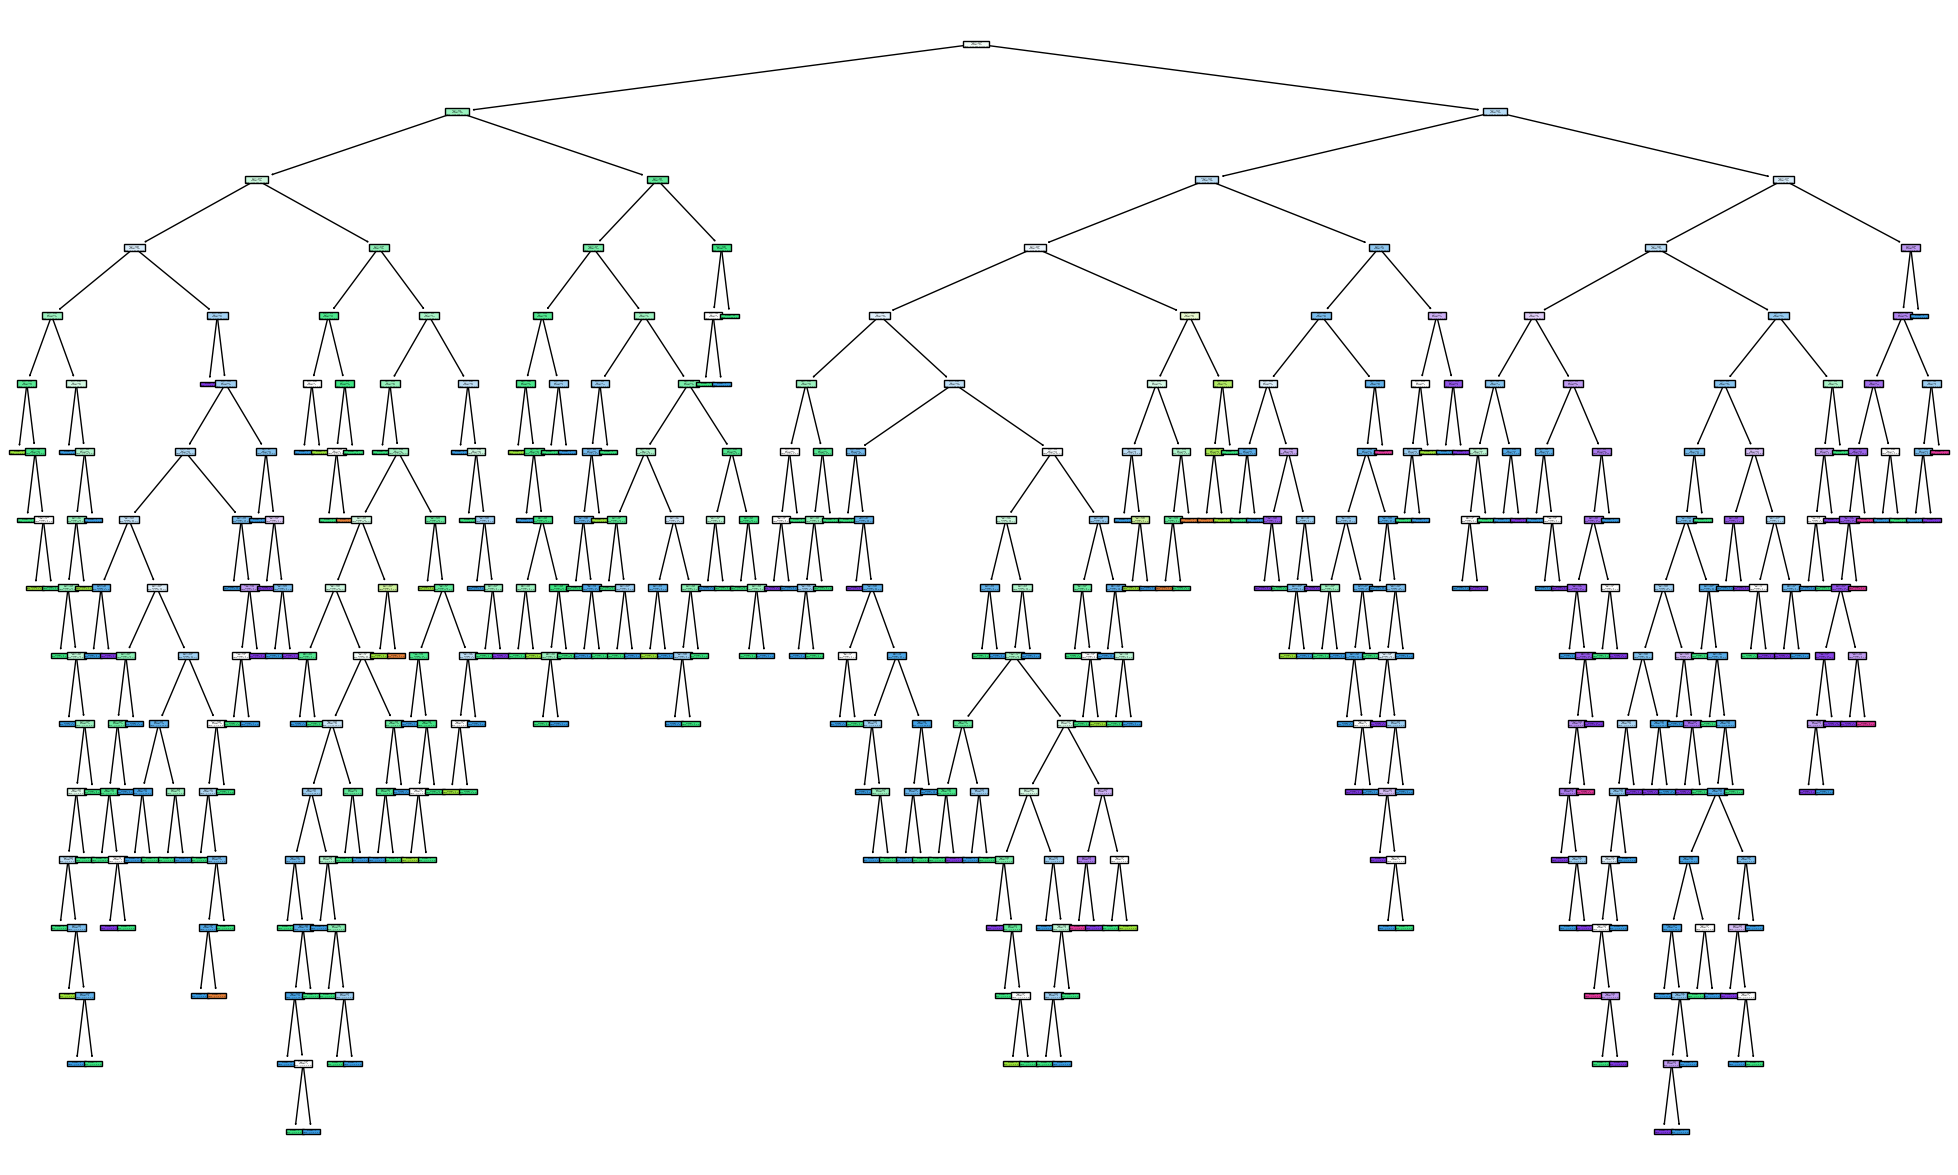

In [19]:
#checking  of ploting decision tree using sklearn tree fuction

from sklearn import tree
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(25,15))
tree.plot_tree(model,filled=True)

In [20]:
fig.savefig("decistion_tree_classifier.png")    #saving Decision tree as png

In [21]:
y_predict=model.predict(X_test)    # predicting x_test

In [22]:
from sklearn.metrics import accuracy_score   # importing performance metrics (  accuracy_score)

In [23]:
accuracy_score(y_test,y_predict)    #accuracy is low    meaning there will be  high variance in test data

0.48775055679287305

In [24]:
#using hyperparameetr,  checking  for best parameter

grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,10,1),
    'min_samples_leaf' : range(1,8,1),
    'min_samples_split': range(2,8,1),
    'splitter' : ['best', 'random']

}

In [25]:
from sklearn.model_selection import GridSearchCV
grid_searh=GridSearchCV(estimator=model,param_grid=grid_param,cv=3,verbose=1)

In [26]:
grid_searh.fit(X_train,y_train)

Fitting 3 folds for each of 1344 candidates, totalling 4032 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 10),
                         'min_samples_leaf': range(1, 8),
                         'min_samples_split': range(2, 8),
                         'splitter': ['best', 'random']},
             verbose=1)

In [27]:
grid_searh.best_params_

{'criterion': 'entropy',
 'max_depth': 4,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'splitter': 'random'}

In [28]:
model_with_best_params=DecisionTreeClassifier(criterion= 'gini',max_depth= 6,min_samples_leaf= 4,min_samples_split= 6,splitter='random')

In [29]:
model_with_best_params.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=4, min_samples_split=6,
                       splitter='random')

[Text(0.6, 0.9285714285714286, 'x[1] <= 0.649\ngini = 0.645\nsamples = 910\nvalue = [7, 31, 389, 359, 114, 10]'),
 Text(0.355, 0.7857142857142857, 'x[1] <= 0.534\ngini = 0.646\nsamples = 705\nvalue = [2, 14, 268, 304, 107, 10]'),
 Text(0.18333333333333332, 0.6428571428571429, 'x[10] <= 10.079\ngini = 0.656\nsamples = 488\nvalue = [1, 9, 150, 224, 96, 8]'),
 Text(0.1, 0.5, 'x[6] <= 62.772\ngini = 0.57\nsamples = 181\nvalue = [1, 6, 98, 66, 10, 0]'),
 Text(0.05333333333333334, 0.35714285714285715, 'x[9] <= 0.554\ngini = 0.605\nsamples = 121\nvalue = [1, 4, 48, 58, 10, 0]'),
 Text(0.02666666666666667, 0.21428571428571427, 'x[6] <= 47.921\ngini = 0.524\nsamples = 27\nvalue = [0, 3, 17, 7, 0, 0]'),
 Text(0.013333333333333334, 0.07142857142857142, 'gini = 0.421\nsamples = 19\nvalue = [0, 2, 14, 3, 0, 0]'),
 Text(0.04, 0.07142857142857142, 'gini = 0.594\nsamples = 8\nvalue = [0, 1, 3, 4, 0, 0]'),
 Text(0.08, 0.21428571428571427, 'x[2] <= 0.169\ngini = 0.585\nsamples = 94\nvalue = [1, 1, 31, 5

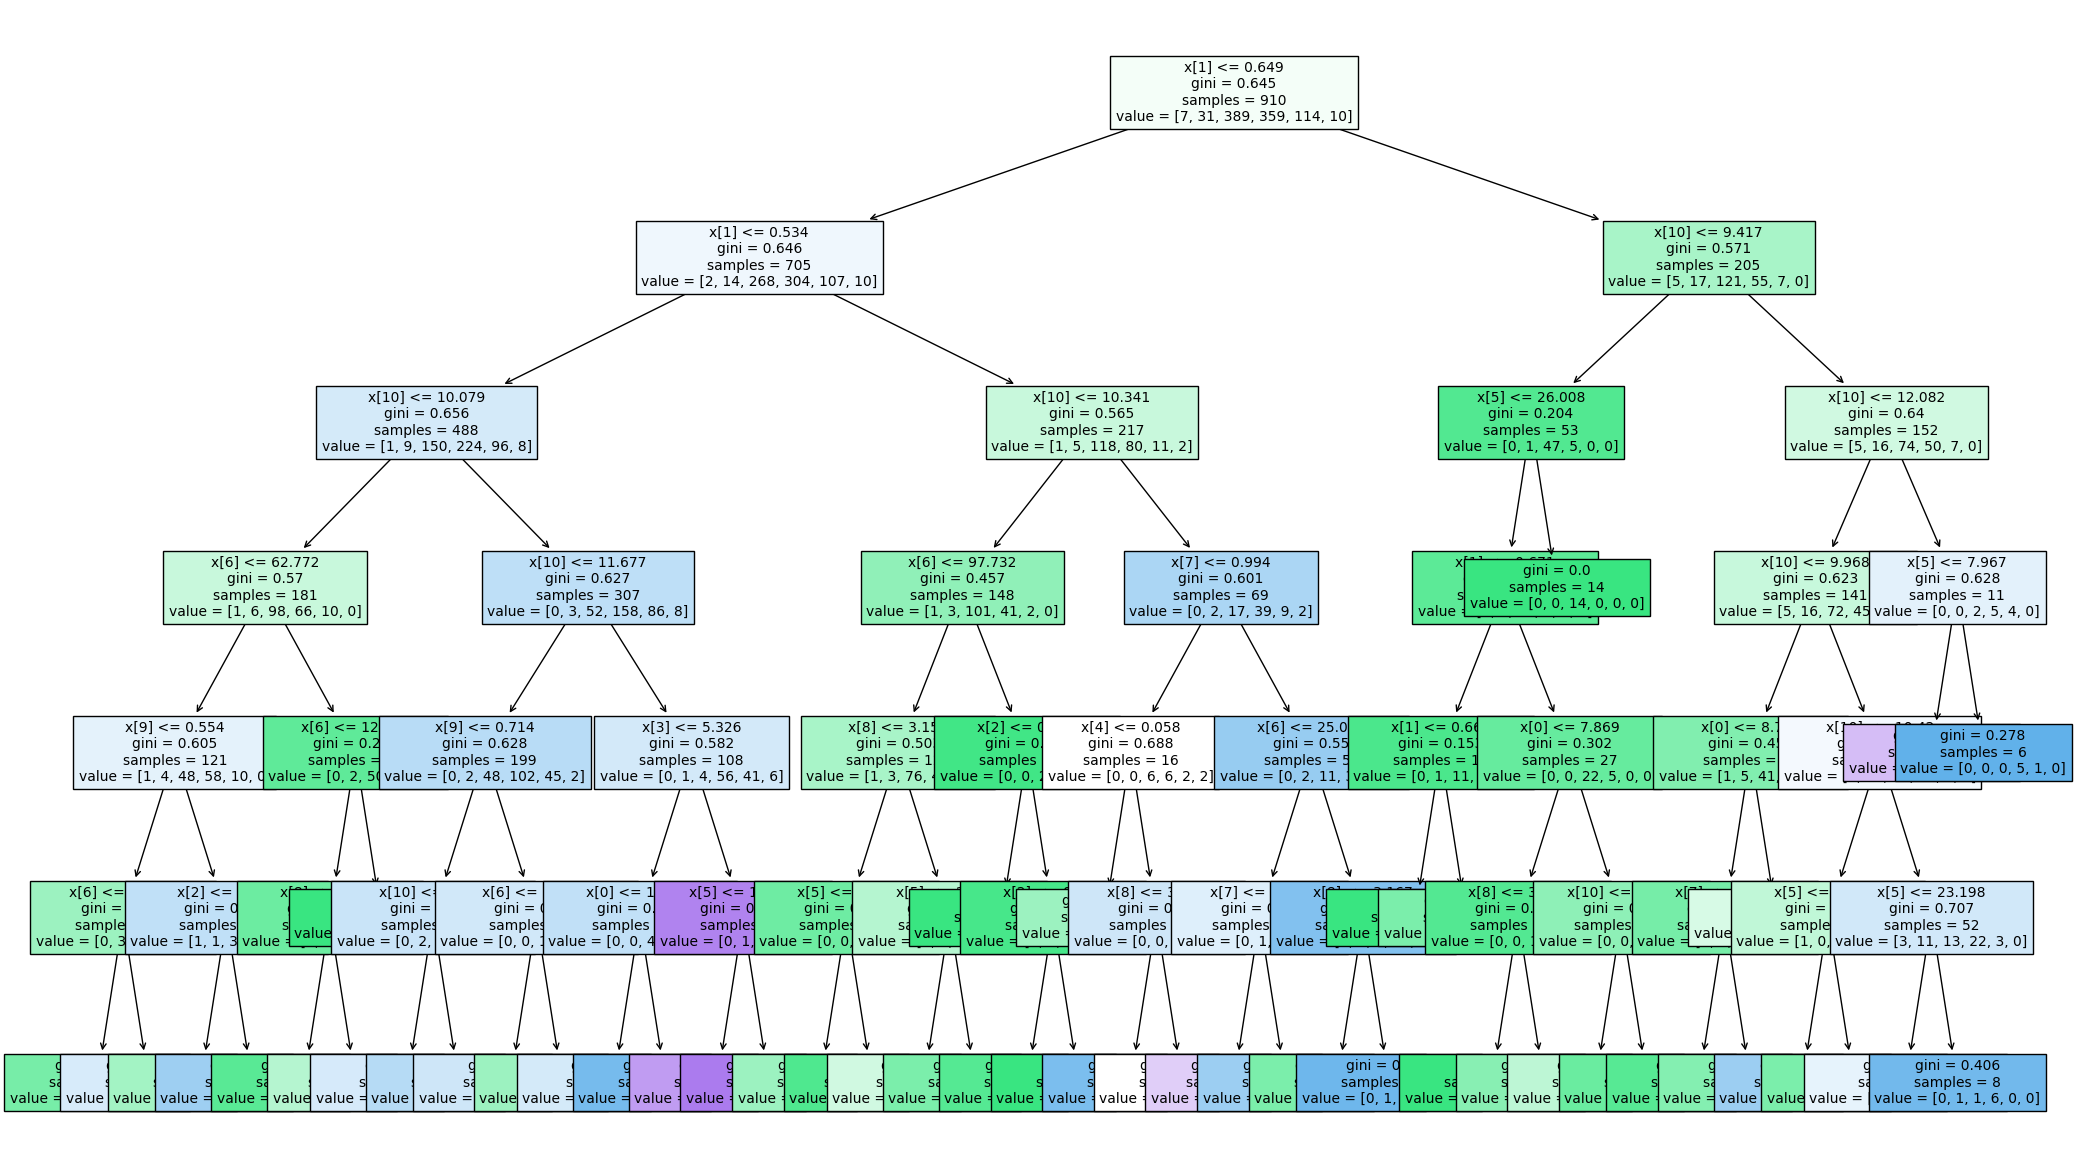

In [30]:
from sklearn import tree
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(25,15))
tree.plot_tree(model_with_best_params,filled=True,fontsize=10)

In [31]:
y_prediction2=model_with_best_params.predict(X_test)

In [32]:
accuracy_score(y_test,y_prediction2)   #there is not much difference in accuracy score

0.5077951002227171


# Random forest  Classifier

In [33]:
from sklearn.ensemble import RandomForestClassifier   #Importing Random forest Classifier
Rf_model=RandomForestClassifier()

In [34]:
Rf_model.fit(X_train,y_train)

RandomForestClassifier()

In [35]:
y_pred_rf=Rf_model.predict(X_test)

In [36]:
accuracy_score(y_test,y_pred_rf)      #Accuracy score of this model is good

0.6057906458797327

In [37]:
# we are tuning three hyperparameters right now, we are passing the different values for both parameters
grid_param = {
    "n_estimators" : [90,100,115,130],
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,20,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'max_features' : ['auto','log2']
}

In [38]:
from sklearn.model_selection import GridSearchCV
grid_searh=GridSearchCV(estimator=Rf_model,param_grid=grid_param,cv=3,verbose=2,n_jobs=-1)

In [39]:
Rf_model_with_best_params=RandomForestClassifier(criterion='gini',max_depth= 14,max_features= 'log2',min_samples_leaf= 1,min_samples_split= 2,n_estimators=115)

In [40]:
Rf_model_with_best_params.fit(X_train,y_train)

RandomForestClassifier(max_depth=14, max_features='log2', n_estimators=115)

In [41]:
y_predict_rf_bp=Rf_model_with_best_params.predict(X_test)

In [42]:
accuracy_score(y_test,y_predict_rf_bp)

0.6035634743875279

# Bagging Classifier

In [43]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification

model_bagging_svc = BaggingClassifier(estimator=SVC(),n_estimators=50, random_state=0).fit(X_train,y_train)


In [44]:
y_predict_bagging=model_bagging_svc.predict(X_test)


In [45]:
accuracy_score(y_test,y_predict_bagging)   # Accuracy score for this model is not good

0.4766146993318486

# Boosting ( Ada Boosting Classifier)

In [46]:
#Training Three Hyperparameter with different parameter for both
from sklearn.ensemble import AdaBoostClassifier
grid_param = {
    "n_estimators" : [90,100,115,130],
    "learning_rate":[0.001 , 0.01, 0.1 , 0.5]
}
model_Ada=AdaBoostClassifier()


In [47]:
grid_search= GridSearchCV(estimator=model_Ada , param_grid=grid_param , cv=3 , verbose=2 , n_jobs=-1)

In [48]:
grid_search.fit(X_train , y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


GridSearchCV(cv=3, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 0.5],
                         'n_estimators': [90, 100, 115, 130]},
             verbose=2)

In [49]:
grid_search.best_params_ #By hyperparameter tunning finding a best parameter for this model

{'learning_rate': 0.001, 'n_estimators': 90}

In [50]:
# model with learning_rate': 0.001, 'n_estimators': 90
model_best_para=AdaBoostClassifier(learning_rate=0.001 , n_estimators=90 )
model_with_best_params.fit(X_train , y_train)
y_predict_ada_best=model_with_best_params.predict(X_test)
accuracy_score(y_test , y_predict_ada_best) # accuracy score of this model is not good

0.5456570155902004

# model using xgboost and Gradient Boosting

In [51]:
#first install xgboost using terminal ----> pip install xgboost
import xgboost
from sklearn.ensemble import GradientBoostingClassifier

In [52]:
model_gbc=GradientBoostingClassifier()
model_gbc.fit(X_train , y_train)
y_predict_gbc=model_gbc.predict(X_test)

In [53]:
print(accuracy_score(y_test , y_predict_gbc))

0.576837416481069


In [54]:
model_xgb=xgboost.XGBClassifier()


In [55]:
model_xgb.fit(X_train , y_train)
y_predict_xgb=model_xgb.predict(X_test)
print(accuracy_score(y_test , y_predict_xgb))

0.5634743875278396


In [56]:
grid_param = {
    "learning_rate":[0.01,0.001,0.1,0.0001],
    "n_estimators" : [90,100,115,130],
    'max_depth' : range(2,20,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'max_features' : ['auto','log2']
}

In [57]:
grid_searh=GridSearchCV(estimator=model_gbc,param_grid=grid_param,cv=5,verbose=2,n_jobs=-1)

In [58]:
best_para_model=grid_search.best_estimator_

In [59]:
best_para_model.fit(X_train , y_train)

AdaBoostClassifier(learning_rate=0.001, n_estimators=90)

In [60]:
y_predict_best_para=best_para_model.predict(X_test)


In [61]:
print(accuracy_score(y_test , y_predict_best_para))

0.5278396436525612


In [62]:
model_logistic=LogisticRegression()

In [63]:
model_logistic.fit(X_train , y_train)
y_predict_logistic=model_logistic.predict(X_test)
print(accuracy_score(y_test , y_predict_logistic))

0.5456570155902004


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [65]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
!pip install optuna
import optuna

def objective_classification(trial, data=X, target=y, use_gpu=False):
    train_x, test_x, train_y, test_y = train_test_split(data, target, test_size=0.20, random_state=10)

    param = {
        'verbosity': 3,
        'objective': "binary:logistic",
        'booster': trial.suggest_categorical('booster', ['dart', 'gbtree', 'gblinear']),
        'lambda': trial.suggest_float('lambda', 1e-4, 1),
        'alpha': trial.suggest_float('alpha', 1e-4, 1),
        'subsample': trial.suggest_float('subsample', 0.1, 0.5),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.1, 0.5)
    }

    if use_gpu:
        param['tree_method'] = 'gpu_hist'
    else:
        param['tree_method'] = 'hist'

    if param['booster'] in ['gbtree', 'dart']:
        param['gamma'] = trial.suggest_float('gamma', 1e-3, 4)
        param['eta'] = trial.suggest_float('eta', 0.001, 5)

    xgb_classification = xgb.XGBClassifier(**param)
    xgb_classification.fit(train_x, train_y, eval_set=[(test_x, test_y)])

    pred = xgb_classification.predict(test_x)
    accuracy = xgb_classification.score(test_x, test_y)

    return accuracy

# Create and optimize the Optuna study
xgb_classification_optuna = optuna.create_study(direction='maximize')
xgb_classification_optuna.optimize(lambda trial: objective_classification(trial, data=X, target=y, use_gpu=False), n_trials=100)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.0/233.0 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 11.0 MB/s eta 0:00:00


[I 2024-07-10 12:13:49,465] A new study created in memory with name: no-name-2574a66e-f3c7-4fd2-ba81-08557bcddabc


[12:13:49] ======== Monitor (0): HostSketchContainer ========
[12:13:49] AllReduce: 0.000333s, 1 calls @ 333us

[12:13:49] MakeCuts: 0.000355s, 1 calls @ 355us

[12:13:49] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[0]	validation_0-mlogloss:2.18768
[1]	validation_0-mlogloss:29.13650
[2]	validation_0-mlogloss:29.13650
[3]	validation_0-mlogloss:29.13650
[4]	validation_0-mlogloss:29.13650
[5]	validation_0-mlogloss:29.13650
[6]	validation_0-mlogloss:29.13650
[7]	validation_0-mlogloss:29.13650
[8]	validation_0-mlogloss:29.13650
[9]	validation_0-mlogloss:29.13650
[10]	validation_0-mlogloss:29.13650
[11]	validation_0-mlogloss:29.13650
[12]	validation_0-mlogloss:29.13650
[13]	validation_0-mlogloss:29.13650
[14]	validation_0-mlogloss:29.13650
[15]	validation_0-mlogloss:29.13650
[16]	validation_0-mlogloss:29.13650
[17]	validation_0-mlogloss:29.13650
[18]	validation_0-mlogloss:29.13650
[19]	validation_0-mlogloss:29.13650
[20]	validation_0-mlogloss:29.13650
[21]	validation_0-mlo

[I 2024-07-10 12:13:49,949] Trial 0 finished with value: 0.10294117647058823 and parameters: {'booster': 'gbtree', 'lambda': 0.7017751799084756, 'alpha': 0.9532637381267887, 'subsample': 0.24321564786963468, 'colsample_bytree': 0.24929420780069556, 'gamma': 3.4812413789577072, 'eta': 4.239158112449717}. Best is trial 0 with value: 0.10294117647058823.


[12:13:49] ======== Monitor (0): HostSketchContainer ========
[12:13:49] AllReduce: 0.000444s, 1 calls @ 444us

[12:13:49] MakeCuts: 0.00048s, 1 calls @ 480us

[12:13:49] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[12:13:49] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[0]	validation_0-mlogloss:1.66602
[12:13:49] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[1]	validation_0-mlogloss:1.57194
[12:13:50] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[2]	validation_0-mlogloss:1.49908
[12:13:50] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[3]	validation_0-mlogloss:1.44036
[12:13:50] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[4]	validation_0-mlogloss:1.38627
[12:13:50] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[5]	validation_0-mlogloss:1.34311
[12:13:50] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[6]	validation_0-mlogloss:1.303

[I 2024-07-10 12:13:56,997] Trial 1 finished with value: 0.5698529411764706 and parameters: {'booster': 'dart', 'lambda': 0.6391219282995524, 'alpha': 0.8077671625097501, 'subsample': 0.36360859937812806, 'colsample_bytree': 0.37632630150427226, 'gamma': 1.8559471678757495, 'eta': 0.14461726282159715}. Best is trial 1 with value: 0.5698529411764706.


[12:13:57] ======== Monitor (0): HostSketchContainer ========
[12:13:57] AllReduce: 0.000308s, 1 calls @ 308us

[12:13:57] MakeCuts: 0.00035s, 1 calls @ 350us

[12:13:57] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[12:13:57] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[0]	validation_0-mlogloss:1.26118
[12:13:57] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[1]	validation_0-mlogloss:1.29373
[12:13:57] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[2]	validation_0-mlogloss:1.39370
[12:13:57] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[3]	validation_0-mlogloss:1.40027
[12:13:57] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[4]	validation_0-mlogloss:1.38568
[12:13:57] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[5]	validation_0-mlogloss:1.39445
[12:13:57] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[6]	validation_0-mlogloss:1.403

[I 2024-07-10 12:14:06,479] Trial 2 finished with value: 0.4852941176470588 and parameters: {'booster': 'dart', 'lambda': 0.13545187110994883, 'alpha': 0.436221042872521, 'subsample': 0.355860803476458, 'colsample_bytree': 0.1508511424717483, 'gamma': 0.8852082101293, 'eta': 1.5144812610894118}. Best is trial 1 with value: 0.5698529411764706.


[12:14:06] ======== Monitor (0): HostSketchContainer ========
[12:14:06] AllReduce: 0.000317s, 1 calls @ 317us

[12:14:06] MakeCuts: 0.000338s, 1 calls @ 338us

[12:14:06] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[0]	validation_0-mlogloss:2.20796
[1]	validation_0-mlogloss:24.53502
[2]	validation_0-mlogloss:24.53502
[3]	validation_0-mlogloss:24.53502
[4]	validation_0-mlogloss:24.53502
[5]	validation_0-mlogloss:24.53502
[6]	validation_0-mlogloss:24.53502
[7]	validation_0-mlogloss:24.53502
[8]	validation_0-mlogloss:24.53502
[9]	validation_0-mlogloss:24.53502
[10]	validation_0-mlogloss:24.53502
[11]	validation_0-mlogloss:24.53502
[12]	validation_0-mlogloss:24.53502
[13]	validation_0-mlogloss:24.53502
[14]	validation_0-mlogloss:24.53502
[15]	validation_0-mlogloss:24.53502
[16]	validation_0-mlogloss:24.53502
[17]	validation_0-mlogloss:24.53502
[18]	validation_0-mlogloss:24.53502
[19]	validation_0-mlogloss:24.53502
[20]	validation_0-mlogloss:24.53502
[21]	validation_0-mlo

[I 2024-07-10 12:14:07,021] Trial 3 finished with value: 0.09926470588235294 and parameters: {'booster': 'gbtree', 'lambda': 0.6732310175937605, 'alpha': 0.4686673841791702, 'subsample': 0.38078958504024574, 'colsample_bytree': 0.10308815630101505, 'gamma': 2.196090203949545, 'eta': 4.14457328295577}. Best is trial 1 with value: 0.5698529411764706.


[12:14:07] ======== Monitor (0): HostSketchContainer ========
[12:14:07] AllReduce: 0.000856s, 1 calls @ 856us

[12:14:07] MakeCuts: 0.00088s, 1 calls @ 880us

[12:14:07] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[12:14:07] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[0]	validation_0-mlogloss:2.10226
[12:14:07] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[1]	validation_0-mlogloss:25.48538
[12:14:07] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[2]	validation_0-mlogloss:23.43219
[12:14:07] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[3]	validation_0-mlogloss:23.43219
[12:14:07] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[4]	validation_0-mlogloss:23.43219
[12:14:07] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[5]	validation_0-mlogloss:23.43219
[12:14:07] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[6]	validation_0-mlogloss:

[I 2024-07-10 12:14:17,177] Trial 4 finished with value: 0.3639705882352941 and parameters: {'booster': 'dart', 'lambda': 0.05767887876740295, 'alpha': 0.46252092191919325, 'subsample': 0.23777416547502536, 'colsample_bytree': 0.27498545045416206, 'gamma': 2.150203446571843, 'eta': 4.218252008524881}. Best is trial 1 with value: 0.5698529411764706.


[12:14:17] ======== Monitor (0): HostSketchContainer ========
[12:14:17] AllReduce: 0.000314s, 1 calls @ 314us

[12:14:17] MakeCuts: 0.000335s, 1 calls @ 335us

[12:14:17] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[12:14:17] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[0]	validation_0-mlogloss:1.82666
[12:14:17] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[1]	validation_0-mlogloss:5.78833
[12:14:17] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[2]	validation_0-mlogloss:14.05139
[12:14:17] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[3]	validation_0-mlogloss:17.27982
[12:14:17] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[4]	validation_0-mlogloss:17.72355
[12:14:17] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[5]	validation_0-mlogloss:17.64252
[12:14:17] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[6]	validation_0-mlogloss:

[I 2024-07-10 12:14:24,043] Trial 5 finished with value: 0.4338235294117647 and parameters: {'booster': 'dart', 'lambda': 0.5853256157635611, 'alpha': 0.29524949870721867, 'subsample': 0.1412589536246221, 'colsample_bytree': 0.39702795298838156, 'gamma': 2.9408181247918646, 'eta': 3.2219112592071513}. Best is trial 1 with value: 0.5698529411764706.


[0]	validation_0-mlogloss:1.43374
[1]	validation_0-mlogloss:1.33074
[2]	validation_0-mlogloss:1.28037
[3]	validation_0-mlogloss:1.25367
[4]	validation_0-mlogloss:1.23883
[5]	validation_0-mlogloss:1.23058
[6]	validation_0-mlogloss:1.22495
[7]	validation_0-mlogloss:1.22079
[8]	validation_0-mlogloss:1.21794
[9]	validation_0-mlogloss:1.21606
[10]	validation_0-mlogloss:1.21482
[11]	validation_0-mlogloss:1.21399
[12]	validation_0-mlogloss:1.21344
[13]	validation_0-mlogloss:1.21304
[14]	validation_0-mlogloss:1.21275
[15]	validation_0-mlogloss:1.21251
[16]	validation_0-mlogloss:1.21232
[17]	validation_0-mlogloss:1.21216
[18]	validation_0-mlogloss:1.21201
[19]	validation_0-mlogloss:1.21188
[20]	validation_0-mlogloss:1.21176
[21]	validation_0-mlogloss:1.21165
[22]	validation_0-mlogloss:1.21155
[23]	validation_0-mlogloss:1.21146
[24]	validation_0-mlogloss:1.21137
[25]	validation_0-mlogloss:1.21129
[26]	validation_0-mlogloss:1.21122
[27]	validation_0-mlogloss:1.21115
[28]	validation_0-mlogloss:1.2

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [12:14:24] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "subsample", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[41]	validation_0-mlogloss:1.21058
[42]	validation_0-mlogloss:1.21056
[43]	validation_0-mlogloss:1.21054
[44]	validation_0-mlogloss:1.21052
[45]	validation_0-mlogloss:1.21050
[46]	validation_0-mlogloss:1.21048
[47]	validation_0-mlogloss:1.21046
[48]	validation_0-mlogloss:1.21045
[49]	validation_0-mlogloss:1.21044
[50]	validation_0-mlogloss:1.21042
[51]	validation_0-mlogloss:1.21041
[52]	validation_0-mlogloss:1.21040
[53]	validation_0-mlogloss:1.21039
[54]	validation_0-mlogloss:1.21038
[55]	validation_0-mlogloss:1.21037
[56]	validation_0-mlogloss:1.21036
[57]	validation_0-mlogloss:1.21035
[58]	validation_0-mlogloss:1.21034
[59]	validation_0-mlogloss:1.21034
[60]	validation_0-mlogloss:1.21033
[61]	validation_0-mlogloss:1.21032
[62]	validation_0-mlogloss:1.21032
[63]	validation_0-mlogloss:1.21031
[64]	validation_0-mlogloss:1.21031
[65]	validation_0-mlogloss:1.21030
[66]	validation_0-mlogloss:1.21030
[67]	validation_0-mlogloss:1.21029
[68]	validation_0-mlogloss:1.21029
[69]	validation_0-ml

[I 2024-07-10 12:14:24,500] Trial 6 finished with value: 0.47794117647058826 and parameters: {'booster': 'gblinear', 'lambda': 0.9718337616268933, 'alpha': 0.9968858620423724, 'subsample': 0.42697012713889915, 'colsample_bytree': 0.46344729653367367}. Best is trial 1 with value: 0.5698529411764706.


[12:14:24] ======== Monitor (0): HostSketchContainer ========
[12:14:24] AllReduce: 0.000314s, 1 calls @ 314us

[12:14:24] MakeCuts: 0.000334s, 1 calls @ 334us

[12:14:24] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[12:14:24] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[0]	validation_0-mlogloss:1.32366
[12:14:24] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[1]	validation_0-mlogloss:1.20556
[12:14:24] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[2]	validation_0-mlogloss:1.14705
[12:14:24] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[3]	validation_0-mlogloss:1.13551
[12:14:24] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[4]	validation_0-mlogloss:1.10859
[12:14:24] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[5]	validation_0-mlogloss:1.09845
[12:14:24] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[6]	validation_0-mlogloss:1.08

[I 2024-07-10 12:14:34,325] Trial 7 finished with value: 0.5257352941176471 and parameters: {'booster': 'dart', 'lambda': 0.8449653080364541, 'alpha': 0.19890472361297296, 'subsample': 0.33441317272356047, 'colsample_bytree': 0.39559938676681095, 'gamma': 2.117236062657363, 'eta': 0.7052963457904954}. Best is trial 1 with value: 0.5698529411764706.


[12:14:34] ======== Monitor (0): HostSketchContainer ========
[12:14:34] AllReduce: 0.000417s, 1 calls @ 417us

[12:14:34] MakeCuts: 0.000441s, 1 calls @ 441us

[12:14:34] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[12:14:34] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[0]	validation_0-mlogloss:2.38095
[12:14:34] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[1]	validation_0-mlogloss:17.74256
[12:14:34] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[2]	validation_0-mlogloss:15.90719
[12:14:34] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[3]	validation_0-mlogloss:16.02057
[12:14:34] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[4]	validation_0-mlogloss:18.27123
[12:14:34] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[5]	validation_0-mlogloss:18.06326
[12:14:34] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[6]	validation_0-mlogloss

[I 2024-07-10 12:14:43,869] Trial 8 finished with value: 0.4117647058823529 and parameters: {'booster': 'dart', 'lambda': 0.9013027588802413, 'alpha': 0.572818990270404, 'subsample': 0.20699721701362767, 'colsample_bytree': 0.4111213680445849, 'gamma': 2.7626787507501445, 'eta': 4.7793458079910005}. Best is trial 1 with value: 0.5698529411764706.


[12:14:43] ======== Monitor (0): Learner ========
[12:14:43] Configure: 0.0007s, 1 calls @ 700us

[12:14:43] EvalOneIter: 2.32224s, 100 calls @ 2322244us

[12:14:43] GetGradient: 0.032028s, 100 calls @ 32028us

[12:14:43] PredictRaw: 6.07059s, 100 calls @ 6070589us

[12:14:43] UpdateOneIter: 6.74104s, 100 calls @ 6741039us

[12:14:43] ======== Monitor (0): GBTree ========
[12:14:43] BoostNewTrees: 0.578587s, 100 calls @ 578587us

[12:14:43] ======== Monitor (0): HistUpdater ========
[12:14:43] BuildHistogram: 0.00079s, 58 calls @ 790us

[12:14:43] EvaluateSplits: 0.082494s, 658 calls @ 82494us

[12:14:43] InitData: 0.065147s, 600 calls @ 65147us

[12:14:43] InitRoot: 0.311256s, 600 calls @ 311256us

[12:14:43] LeafPartition: 9.6e-05s, 600 calls @ 96us

[12:14:43] UpdatePosition: 0.000605s, 59 calls @ 605us

[12:14:43] UpdatePredictionCache: 0.066134s, 600 calls @ 66134us

[12:14:43] UpdateTree: 0.379546s, 600 calls @ 379546us

[12:14:43] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using t

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [12:14:43] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "subsample", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[41]	validation_0-mlogloss:1.20791
[42]	validation_0-mlogloss:1.20790
[43]	validation_0-mlogloss:1.20790
[44]	validation_0-mlogloss:1.20790
[45]	validation_0-mlogloss:1.20789
[46]	validation_0-mlogloss:1.20789
[47]	validation_0-mlogloss:1.20789
[48]	validation_0-mlogloss:1.20789
[49]	validation_0-mlogloss:1.20789
[50]	validation_0-mlogloss:1.20789
[51]	validation_0-mlogloss:1.20789
[52]	validation_0-mlogloss:1.20789
[53]	validation_0-mlogloss:1.20789
[54]	validation_0-mlogloss:1.20789
[55]	validation_0-mlogloss:1.20789
[56]	validation_0-mlogloss:1.20789
[57]	validation_0-mlogloss:1.20790
[58]	validation_0-mlogloss:1.20790
[59]	validation_0-mlogloss:1.20790
[60]	validation_0-mlogloss:1.20790
[61]	validation_0-mlogloss:1.20790
[62]	validation_0-mlogloss:1.20791
[63]	validation_0-mlogloss:1.20791
[64]	validation_0-mlogloss:1.20791
[65]	validation_0-mlogloss:1.20791
[66]	validation_0-mlogloss:1.20791
[67]	validation_0-mlogloss:1.20792
[68]	validation_0-mlogloss:1.20792
[69]	validation_0-ml

[I 2024-07-10 12:14:44,405] Trial 9 finished with value: 0.4632352941176471 and parameters: {'booster': 'gblinear', 'lambda': 0.3782041555076091, 'alpha': 0.4774194907584362, 'subsample': 0.1819732742009973, 'colsample_bytree': 0.336380882616634}. Best is trial 1 with value: 0.5698529411764706.


[12:14:44] ======== Monitor (0): HostSketchContainer ========
[12:14:44] AllReduce: 0.000359s, 1 calls @ 359us

[12:14:44] MakeCuts: 0.000383s, 1 calls @ 383us

[12:14:44] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[0]	validation_0-mlogloss:1.69227
[1]	validation_0-mlogloss:1.61981
[2]	validation_0-mlogloss:1.55521
[3]	validation_0-mlogloss:1.50010
[4]	validation_0-mlogloss:1.45193
[5]	validation_0-mlogloss:1.40592
[6]	validation_0-mlogloss:1.36992
[7]	validation_0-mlogloss:1.33924
[8]	validation_0-mlogloss:1.30842
[9]	validation_0-mlogloss:1.28352
[10]	validation_0-mlogloss:1.26021
[11]	validation_0-mlogloss:1.24184
[12]	validation_0-mlogloss:1.22736
[13]	validation_0-mlogloss:1.20658
[14]	validation_0-mlogloss:1.19346
[15]	validation_0-mlogloss:1.18135
[16]	validation_0-mlogloss:1.16328
[17]	validation_0-mlogloss:1.15075
[18]	validation_0-mlogloss:1.14200
[19]	validation_0-mlogloss:1.13619
[20]	validation_0-mlogloss:1.12822
[21]	validation_0-mlogloss:1.11786
[22]	v

[I 2024-07-10 12:14:45,152] Trial 10 finished with value: 0.5441176470588235 and parameters: {'booster': 'gbtree', 'lambda': 0.3163603174381105, 'alpha': 0.8357318465534455, 'subsample': 0.49796949997453627, 'colsample_bytree': 0.196798712249781, 'gamma': 0.6029703678972016, 'eta': 0.12148934285834469}. Best is trial 1 with value: 0.5698529411764706.


[12:14:45] ======== Monitor (0): HostSketchContainer ========
[12:14:45] AllReduce: 0.000309s, 1 calls @ 309us

[12:14:45] MakeCuts: 0.000332s, 1 calls @ 332us

[12:14:45] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[0]	validation_0-mlogloss:1.69050
[1]	validation_0-mlogloss:1.61708
[2]	validation_0-mlogloss:1.54838
[3]	validation_0-mlogloss:1.49239
[4]	validation_0-mlogloss:1.44479
[5]	validation_0-mlogloss:1.39827
[6]	validation_0-mlogloss:1.36158
[7]	validation_0-mlogloss:1.32989
[8]	validation_0-mlogloss:1.29838
[9]	validation_0-mlogloss:1.27434
[10]	validation_0-mlogloss:1.25029
[11]	validation_0-mlogloss:1.23184
[12]	validation_0-mlogloss:1.21878
[13]	validation_0-mlogloss:1.19749
[14]	validation_0-mlogloss:1.18407
[15]	validation_0-mlogloss:1.17345
[16]	validation_0-mlogloss:1.15777
[17]	validation_0-mlogloss:1.14595
[18]	validation_0-mlogloss:1.13770
[19]	validation_0-mlogloss:1.13307
[20]	validation_0-mlogloss:1.12716
[21]	validation_0-mlogloss:1.11828
[22]	v

[I 2024-07-10 12:14:46,039] Trial 11 finished with value: 0.5441176470588235 and parameters: {'booster': 'gbtree', 'lambda': 0.378598998252693, 'alpha': 0.7731012406699265, 'subsample': 0.49123099280986743, 'colsample_bytree': 0.20623871934926963, 'gamma': 0.4303686365297359, 'eta': 0.12745921424791318}. Best is trial 1 with value: 0.5698529411764706.


[12:14:46] ======== Monitor (0): HostSketchContainer ========
[12:14:46] AllReduce: 0.000311s, 1 calls @ 311us

[12:14:46] MakeCuts: 0.000371s, 1 calls @ 371us

[12:14:46] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[0]	validation_0-mlogloss:1.24439
[1]	validation_0-mlogloss:1.29877
[2]	validation_0-mlogloss:1.37739
[3]	validation_0-mlogloss:1.38284
[4]	validation_0-mlogloss:1.45387
[5]	validation_0-mlogloss:1.48399
[6]	validation_0-mlogloss:1.48616
[7]	validation_0-mlogloss:1.56026
[8]	validation_0-mlogloss:1.59864
[9]	validation_0-mlogloss:1.65284
[10]	validation_0-mlogloss:1.70303
[11]	validation_0-mlogloss:1.74609
[12]	validation_0-mlogloss:1.78702
[13]	validation_0-mlogloss:1.76729
[14]	validation_0-mlogloss:1.79869
[15]	validation_0-mlogloss:1.82237
[16]	validation_0-mlogloss:1.79547
[17]	validation_0-mlogloss:1.80511
[18]	validation_0-mlogloss:1.77656
[19]	validation_0-mlogloss:1.76942
[20]	validation_0-mlogloss:1.73417
[21]	validation_0-mlogloss:1.76911
[22]	v

[I 2024-07-10 12:14:46,727] Trial 12 finished with value: 0.5073529411764706 and parameters: {'booster': 'gbtree', 'lambda': 0.27787371560715507, 'alpha': 0.7362799332621961, 'subsample': 0.4975372364762733, 'colsample_bytree': 0.3234511555216706, 'gamma': 1.2310739203621084, 'eta': 1.5302644395040634}. Best is trial 1 with value: 0.5698529411764706.


[12:14:46] ======== Monitor (0): HostSketchContainer ========
[12:14:46] AllReduce: 0.000331s, 1 calls @ 331us

[12:14:46] MakeCuts: 0.000352s, 1 calls @ 352us

[12:14:46] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[0]	validation_0-mlogloss:1.76473
[1]	validation_0-mlogloss:1.74067
[2]	validation_0-mlogloss:1.71764
[3]	validation_0-mlogloss:1.69615
[4]	validation_0-mlogloss:1.67464
[5]	validation_0-mlogloss:1.65438
[6]	validation_0-mlogloss:1.63289
[7]	validation_0-mlogloss:1.61446
[8]	validation_0-mlogloss:1.59638
[9]	validation_0-mlogloss:1.58211
[10]	validation_0-mlogloss:1.56441
[11]	validation_0-mlogloss:1.55112
[12]	validation_0-mlogloss:1.53817
[13]	validation_0-mlogloss:1.52122
[14]	validation_0-mlogloss:1.50762
[15]	validation_0-mlogloss:1.49442
[16]	validation_0-mlogloss:1.47926
[17]	validation_0-mlogloss:1.46572
[18]	validation_0-mlogloss:1.45315
[19]	validation_0-mlogloss:1.44363
[20]	validation_0-mlogloss:1.43414
[21]	validation_0-mlogloss:1.42222
[22]	v

[I 2024-07-10 12:14:47,806] Trial 13 finished with value: 0.5661764705882353 and parameters: {'booster': 'gbtree', 'lambda': 0.501156321958945, 'alpha': 0.785052040855875, 'subsample': 0.42251722260233116, 'colsample_bytree': 0.2032451004588968, 'gamma': 0.019669006480058315, 'eta': 0.033025572484764176}. Best is trial 1 with value: 0.5698529411764706.


[0]	validation_0-mlogloss:1.41284
[1]	validation_0-mlogloss:1.31835
[2]	validation_0-mlogloss:1.27198
[3]	validation_0-mlogloss:1.24612
[4]	validation_0-mlogloss:1.23123
[5]	validation_0-mlogloss:1.22270
[6]	validation_0-mlogloss:1.21801
[7]	validation_0-mlogloss:1.21566
[8]	validation_0-mlogloss:1.21414
[9]	validation_0-mlogloss:1.21289
[10]	validation_0-mlogloss:1.21203
[11]	validation_0-mlogloss:1.21149
[12]	validation_0-mlogloss:1.21115
[13]	validation_0-mlogloss:1.21093
[14]	validation_0-mlogloss:1.21077
[15]	validation_0-mlogloss:1.21065
[16]	validation_0-mlogloss:1.21055
[17]	validation_0-mlogloss:1.21045
[18]	validation_0-mlogloss:1.21037
[19]	validation_0-mlogloss:1.21029
[20]	validation_0-mlogloss:1.21022
[21]	validation_0-mlogloss:1.21015
[22]	validation_0-mlogloss:1.21008
[23]	validation_0-mlogloss:1.21002
[24]	validation_0-mlogloss:1.20997
[25]	validation_0-mlogloss:1.20992
[26]	validation_0-mlogloss:1.20987
[27]	validation_0-mlogloss:1.20980
[28]	validation_0-mlogloss:1.2

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [12:14:47] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "subsample", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[32]	validation_0-mlogloss:1.20949
[33]	validation_0-mlogloss:1.20945
[34]	validation_0-mlogloss:1.20940
[35]	validation_0-mlogloss:1.20936
[36]	validation_0-mlogloss:1.20933
[37]	validation_0-mlogloss:1.20929
[38]	validation_0-mlogloss:1.20926
[39]	validation_0-mlogloss:1.20924
[40]	validation_0-mlogloss:1.20921
[41]	validation_0-mlogloss:1.20918
[42]	validation_0-mlogloss:1.20916
[43]	validation_0-mlogloss:1.20914
[44]	validation_0-mlogloss:1.20912
[45]	validation_0-mlogloss:1.20910
[46]	validation_0-mlogloss:1.20909
[47]	validation_0-mlogloss:1.20907
[48]	validation_0-mlogloss:1.20906
[49]	validation_0-mlogloss:1.20904
[50]	validation_0-mlogloss:1.20903
[51]	validation_0-mlogloss:1.20902
[52]	validation_0-mlogloss:1.20901
[53]	validation_0-mlogloss:1.20900
[54]	validation_0-mlogloss:1.20899
[55]	validation_0-mlogloss:1.20898
[56]	validation_0-mlogloss:1.20897
[57]	validation_0-mlogloss:1.20896
[58]	validation_0-mlogloss:1.20895
[59]	validation_0-mlogloss:1.20895
[60]	validation_0-ml

[I 2024-07-10 12:14:48,397] Trial 14 finished with value: 0.4632352941176471 and parameters: {'booster': 'gblinear', 'lambda': 0.560094155485681, 'alpha': 0.6680419028697251, 'subsample': 0.41282964875771955, 'colsample_bytree': 0.48054352113545096}. Best is trial 1 with value: 0.5698529411764706.


[12:14:48] ======== Monitor (0): HostSketchContainer ========
[12:14:48] AllReduce: 0.000317s, 1 calls @ 317us

[12:14:48] MakeCuts: 0.000341s, 1 calls @ 341us

[12:14:48] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[12:14:48] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[0]	validation_0-mlogloss:1.32732
[12:14:48] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[1]	validation_0-mlogloss:1.35810
[12:14:48] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[2]	validation_0-mlogloss:1.51255
[12:14:48] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[3]	validation_0-mlogloss:1.56122
[12:14:48] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[4]	validation_0-mlogloss:1.62409
[12:14:48] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[5]	validation_0-mlogloss:1.77705
[12:14:48] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[6]	validation_0-mlogloss:1.87

[I 2024-07-10 12:14:58,939] Trial 15 finished with value: 0.47058823529411764 and parameters: {'booster': 'dart', 'lambda': 0.7597318770046899, 'alpha': 0.009745898491570981, 'subsample': 0.29436347949924535, 'colsample_bytree': 0.3457297915537264, 'gamma': 0.07361297705130454, 'eta': 1.2971525662607877}. Best is trial 1 with value: 0.5698529411764706.


[12:14:58] ======== Monitor (0): HostSketchContainer ========
[12:14:58] AllReduce: 0.00033s, 1 calls @ 330us

[12:14:58] MakeCuts: 0.00035s, 1 calls @ 350us

[12:14:58] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[0]	validation_0-mlogloss:1.56245
[1]	validation_0-mlogloss:3.71480
[2]	validation_0-mlogloss:7.64304
[3]	validation_0-mlogloss:15.50103
[4]	validation_0-mlogloss:22.57325
[5]	validation_0-mlogloss:22.60300
[6]	validation_0-mlogloss:18.84148
[7]	validation_0-mlogloss:23.29593
[8]	validation_0-mlogloss:23.29593
[9]	validation_0-mlogloss:23.29593
[10]	validation_0-mlogloss:23.29593
[11]	validation_0-mlogloss:23.29593
[12]	validation_0-mlogloss:23.39634
[13]	validation_0-mlogloss:23.39634
[14]	validation_0-mlogloss:23.39634
[15]	validation_0-mlogloss:23.39634
[16]	validation_0-mlogloss:23.39634
[17]	validation_0-mlogloss:23.39634
[18]	validation_0-mlogloss:23.39634
[19]	validation_0-mlogloss:23.39634
[20]	validation_0-mlogloss:23.39634
[21]	validation_0-mloglos

[I 2024-07-10 12:14:59,659] Trial 16 finished with value: 0.3602941176470588 and parameters: {'booster': 'gbtree', 'lambda': 0.4921102160703024, 'alpha': 0.8612932298436649, 'subsample': 0.4357057624949983, 'colsample_bytree': 0.2168076447494799, 'gamma': 1.4212496281417328, 'eta': 2.607180326973156}. Best is trial 1 with value: 0.5698529411764706.


[12:14:59] ======== Monitor (0): HostSketchContainer ========
[12:14:59] AllReduce: 0.000345s, 1 calls @ 345us

[12:14:59] MakeCuts: 0.000367s, 1 calls @ 367us

[12:14:59] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[12:14:59] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[0]	validation_0-mlogloss:1.30937
[12:14:59] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[1]	validation_0-mlogloss:1.21532
[12:14:59] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[2]	validation_0-mlogloss:1.18073
[12:14:59] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[3]	validation_0-mlogloss:1.16955
[12:14:59] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[4]	validation_0-mlogloss:1.15849
[12:14:59] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[5]	validation_0-mlogloss:1.15655
[12:14:59] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[6]	validation_0-mlogloss:1.14

[I 2024-07-10 12:15:09,410] Trial 17 finished with value: 0.5588235294117647 and parameters: {'booster': 'dart', 'lambda': 0.48783889080928095, 'alpha': 0.6341822423350183, 'subsample': 0.31167155838656224, 'colsample_bytree': 0.1501700683025543, 'gamma': 3.774303466372859, 'eta': 0.8132197510501723}. Best is trial 1 with value: 0.5698529411764706.


[12:15:09] ======== Monitor (0): HostSketchContainer ========
[12:15:09] AllReduce: 0.000311s, 1 calls @ 311us

[12:15:09] MakeCuts: 0.000332s, 1 calls @ 332us

[12:15:09] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[0]	validation_0-mlogloss:1.35810
[1]	validation_0-mlogloss:1.53432
[2]	validation_0-mlogloss:1.62658
[3]	validation_0-mlogloss:1.73083
[4]	validation_0-mlogloss:1.70304
[5]	validation_0-mlogloss:1.88748
[6]	validation_0-mlogloss:1.96562
[7]	validation_0-mlogloss:2.04182
[8]	validation_0-mlogloss:2.26278
[9]	validation_0-mlogloss:2.22779
[10]	validation_0-mlogloss:2.34817
[11]	validation_0-mlogloss:2.58964
[12]	validation_0-mlogloss:2.48924
[13]	validation_0-mlogloss:2.47344
[14]	validation_0-mlogloss:2.58004
[15]	validation_0-mlogloss:2.65519
[16]	validation_0-mlogloss:2.82625
[17]	validation_0-mlogloss:2.78469
[18]	validation_0-mlogloss:2.87525
[19]	validation_0-mlogloss:2.87314
[20]	validation_0-mlogloss:3.03205
[21]	validation_0-mlogloss:3.02938
[22]	v

[I 2024-07-10 12:15:10,178] Trial 18 finished with value: 0.4375 and parameters: {'booster': 'gbtree', 'lambda': 0.6209933861022783, 'alpha': 0.8828846779607735, 'subsample': 0.3803015684229963, 'colsample_bytree': 0.28598167179350176, 'gamma': 1.5664218804716554, 'eta': 1.9513523978437186}. Best is trial 1 with value: 0.5698529411764706.


[0]	validation_0-mlogloss:1.41623
[1]	validation_0-mlogloss:1.32050
[2]	validation_0-mlogloss:1.27329
[3]	validation_0-mlogloss:1.24734
[4]	validation_0-mlogloss:1.23246
[5]	validation_0-mlogloss:1.22409
[6]	validation_0-mlogloss:1.21953
[7]	validation_0-mlogloss:1.21717
[8]	validation_0-mlogloss:1.21529
[9]	validation_0-mlogloss:1.21384
[10]	validation_0-mlogloss:1.21285
[11]	validation_0-mlogloss:1.21220
[12]	validation_0-mlogloss:1.21178
[13]	validation_0-mlogloss:1.21150
[14]	validation_0-mlogloss:1.21130
[15]	validation_0-mlogloss:1.21115
[16]	validation_0-mlogloss:1.21103
[17]	validation_0-mlogloss:1.21092
[18]	validation_0-mlogloss:1.21083
[19]	validation_0-mlogloss:1.21074
[20]	validation_0-mlogloss:1.21062
[21]	validation_0-mlogloss:1.21050
[22]	validation_0-mlogloss:1.21039
[23]	validation_0-mlogloss:1.21029


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [12:15:10] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "subsample", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[24]	validation_0-mlogloss:1.21020
[25]	validation_0-mlogloss:1.21011
[26]	validation_0-mlogloss:1.21003
[27]	validation_0-mlogloss:1.20996
[28]	validation_0-mlogloss:1.20989
[29]	validation_0-mlogloss:1.20983
[30]	validation_0-mlogloss:1.20977
[31]	validation_0-mlogloss:1.20972
[32]	validation_0-mlogloss:1.20967
[33]	validation_0-mlogloss:1.20963
[34]	validation_0-mlogloss:1.20959
[35]	validation_0-mlogloss:1.20955
[36]	validation_0-mlogloss:1.20951
[37]	validation_0-mlogloss:1.20948
[38]	validation_0-mlogloss:1.20945
[39]	validation_0-mlogloss:1.20942
[40]	validation_0-mlogloss:1.20940
[41]	validation_0-mlogloss:1.20937
[42]	validation_0-mlogloss:1.20935
[43]	validation_0-mlogloss:1.20933
[44]	validation_0-mlogloss:1.20931
[45]	validation_0-mlogloss:1.20929
[46]	validation_0-mlogloss:1.20928
[47]	validation_0-mlogloss:1.20926
[48]	validation_0-mlogloss:1.20925
[49]	validation_0-mlogloss:1.20923
[50]	validation_0-mlogloss:1.20922
[51]	validation_0-mlogloss:1.20921
[52]	validation_0-ml

[I 2024-07-10 12:15:10,810] Trial 19 finished with value: 0.47794117647058826 and parameters: {'booster': 'gblinear', 'lambda': 0.7841710035999747, 'alpha': 0.7168419255657118, 'subsample': 0.29404912781348885, 'colsample_bytree': 0.3621251347666925}. Best is trial 1 with value: 0.5698529411764706.


[12:15:10] ======== Monitor (0): HostSketchContainer ========
[12:15:10] AllReduce: 0.000327s, 1 calls @ 327us

[12:15:10] MakeCuts: 0.00035s, 1 calls @ 350us

[12:15:10] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[0]	validation_0-mlogloss:1.30856
[1]	validation_0-mlogloss:1.22233
[2]	validation_0-mlogloss:1.17729
[3]	validation_0-mlogloss:1.17401
[4]	validation_0-mlogloss:1.17040
[5]	validation_0-mlogloss:1.17754
[6]	validation_0-mlogloss:1.19738
[7]	validation_0-mlogloss:1.19777
[8]	validation_0-mlogloss:1.25427
[9]	validation_0-mlogloss:1.29249
[10]	validation_0-mlogloss:1.32758
[11]	validation_0-mlogloss:1.32302
[12]	validation_0-mlogloss:1.33172
[13]	validation_0-mlogloss:1.31808
[14]	validation_0-mlogloss:1.31333
[15]	validation_0-mlogloss:1.34467
[16]	validation_0-mlogloss:1.31532
[17]	validation_0-mlogloss:1.33103
[18]	validation_0-mlogloss:1.31839
[19]	validation_0-mlogloss:1.32952
[20]	validation_0-mlogloss:1.34935
[21]	validation_0-mlogloss:1.37351
[22]	va

[I 2024-07-10 12:15:11,712] Trial 20 finished with value: 0.5404411764705882 and parameters: {'booster': 'gbtree', 'lambda': 0.21112292251385545, 'alpha': 0.587029259293928, 'subsample': 0.4491718720757897, 'colsample_bytree': 0.44922234292572105, 'gamma': 0.09282802849298223, 'eta': 0.7661222288618907}. Best is trial 1 with value: 0.5698529411764706.


[12:15:11] ======== Monitor (0): HostSketchContainer ========
[12:15:11] AllReduce: 0.003119s, 1 calls @ 3119us

[12:15:11] MakeCuts: 0.003695s, 1 calls @ 3695us

[12:15:11] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[12:15:11] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[0]	validation_0-mlogloss:1.39117
[12:15:11] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[1]	validation_0-mlogloss:1.27083
[12:15:11] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[2]	validation_0-mlogloss:1.20685
[12:15:11] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[3]	validation_0-mlogloss:1.18240
[12:15:11] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[4]	validation_0-mlogloss:1.16532
[12:15:11] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[5]	validation_0-mlogloss:1.15739
[12:15:11] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[6]	validation_0-mlogloss:1.

[I 2024-07-10 12:15:20,394] Trial 21 finished with value: 0.5588235294117647 and parameters: {'booster': 'dart', 'lambda': 0.48038005081391677, 'alpha': 0.6878467657052137, 'subsample': 0.32345392214956237, 'colsample_bytree': 0.13086835433628996, 'gamma': 3.756418218644237, 'eta': 0.6095686867790727}. Best is trial 1 with value: 0.5698529411764706.


[12:15:20] ======== Monitor (0): HostSketchContainer ========
[12:15:20] AllReduce: 0.000312s, 1 calls @ 312us

[12:15:20] MakeCuts: 0.000333s, 1 calls @ 333us

[12:15:20] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[12:15:20] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[0]	validation_0-mlogloss:1.70691
[12:15:20] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[1]	validation_0-mlogloss:1.64955
[12:15:20] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[2]	validation_0-mlogloss:1.59604
[12:15:20] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[3]	validation_0-mlogloss:1.55051
[12:15:20] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[4]	validation_0-mlogloss:1.51206
[12:15:20] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[5]	validation_0-mlogloss:1.47440
[12:15:20] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[6]	validation_0-mlogloss:1.43

[I 2024-07-10 12:15:29,199] Trial 22 finished with value: 0.5698529411764706 and parameters: {'booster': 'dart', 'lambda': 0.46019632840427216, 'alpha': 0.6076685419979332, 'subsample': 0.27261816107717013, 'colsample_bytree': 0.17930431435977318, 'gamma': 2.844976442332153, 'eta': 0.10561699512482908}. Best is trial 1 with value: 0.5698529411764706.


[12:15:29] ======== Monitor (0): HostSketchContainer ========
[12:15:29] AllReduce: 0.000353s, 1 calls @ 353us

[12:15:29] MakeCuts: 0.000375s, 1 calls @ 375us

[12:15:29] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[12:15:29] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[0]	validation_0-mlogloss:1.74231
[12:15:29] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[1]	validation_0-mlogloss:1.69994
[12:15:29] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[2]	validation_0-mlogloss:1.66112
[12:15:29] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[3]	validation_0-mlogloss:1.62791
[12:15:29] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[4]	validation_0-mlogloss:1.59735
[12:15:29] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[5]	validation_0-mlogloss:1.56674
[12:15:29] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[6]	validation_0-mlogloss:1.53

[I 2024-07-10 12:15:38,741] Trial 23 finished with value: 0.5919117647058824 and parameters: {'booster': 'dart', 'lambda': 0.4051993786000216, 'alpha': 0.8092906513336443, 'subsample': 0.26893415404674453, 'colsample_bytree': 0.23626626130749254, 'gamma': 2.7540786270026927, 'eta': 0.058783392801522005}. Best is trial 23 with value: 0.5919117647058824.


[12:15:38] ======== Monitor (0): HostSketchContainer ========
[12:15:38] AllReduce: 0.000363s, 1 calls @ 363us

[12:15:38] MakeCuts: 0.000384s, 1 calls @ 384us

[12:15:38] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[12:15:38] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[0]	validation_0-mlogloss:1.44715
[12:15:38] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[1]	validation_0-mlogloss:1.31823
[12:15:38] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[2]	validation_0-mlogloss:1.24160
[12:15:38] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[3]	validation_0-mlogloss:1.19506
[12:15:38] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[4]	validation_0-mlogloss:1.16452
[12:15:38] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[5]	validation_0-mlogloss:1.13521
[12:15:38] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[6]	validation_0-mlogloss:1.12

[I 2024-07-10 12:15:45,948] Trial 24 finished with value: 0.5882352941176471 and parameters: {'booster': 'dart', 'lambda': 0.4302615078761194, 'alpha': 0.8918864181478828, 'subsample': 0.2688004428707855, 'colsample_bytree': 0.24799278406214226, 'gamma': 2.553431810610903, 'eta': 0.4912298739738476}. Best is trial 23 with value: 0.5919117647058824.


[12:15:45] ======== Monitor (0): HostSketchContainer ========
[12:15:45] AllReduce: 0.000329s, 1 calls @ 329us

[12:15:45] MakeCuts: 0.000373s, 1 calls @ 373us

[12:15:45] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[12:15:45] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[0]	validation_0-mlogloss:1.27027
[12:15:46] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[1]	validation_0-mlogloss:1.21600
[12:15:46] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[2]	validation_0-mlogloss:1.18524
[12:15:46] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[3]	validation_0-mlogloss:1.18128
[12:15:46] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[4]	validation_0-mlogloss:1.16002
[12:15:46] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[5]	validation_0-mlogloss:1.17307
[12:15:46] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[6]	validation_0-mlogloss:1.13

[I 2024-07-10 12:15:55,866] Trial 25 finished with value: 0.5404411764705882 and parameters: {'booster': 'dart', 'lambda': 0.40191951323014913, 'alpha': 0.9382311752286923, 'subsample': 0.2555815187500697, 'colsample_bytree': 0.24592735296016321, 'gamma': 2.538114489345566, 'eta': 1.128157417505962}. Best is trial 23 with value: 0.5919117647058824.


[12:15:55] ======== Monitor (0): HostSketchContainer ========
[12:15:55] AllReduce: 0.00033s, 1 calls @ 330us

[12:15:55] MakeCuts: 0.000359s, 1 calls @ 359us

[12:15:55] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[12:15:55] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[0]	validation_0-mlogloss:1.42092
[12:15:55] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[1]	validation_0-mlogloss:1.97260
[12:15:55] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[2]	validation_0-mlogloss:2.32132
[12:15:55] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[3]	validation_0-mlogloss:4.04118
[12:15:55] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[4]	validation_0-mlogloss:4.38731
[12:15:55] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[5]	validation_0-mlogloss:5.72984
[12:15:55] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[6]	validation_0-mlogloss:7.290

[I 2024-07-10 12:16:05,820] Trial 26 finished with value: 0.3272058823529412 and parameters: {'booster': 'dart', 'lambda': 0.23999833900178996, 'alpha': 0.8341777618217153, 'subsample': 0.2032358409521534, 'colsample_bytree': 0.30723941065370064, 'gamma': 1.7682497319335677, 'eta': 2.241530949675409}. Best is trial 23 with value: 0.5919117647058824.


[12:16:05] ======== Monitor (0): HostSketchContainer ========
[12:16:05] AllReduce: 0.000356s, 1 calls @ 356us

[12:16:05] MakeCuts: 0.000378s, 1 calls @ 378us

[12:16:05] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[12:16:05] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[0]	validation_0-mlogloss:1.50043
[12:16:05] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[1]	validation_0-mlogloss:1.38292
[12:16:05] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[2]	validation_0-mlogloss:1.29325
[12:16:05] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[3]	validation_0-mlogloss:1.24742
[12:16:05] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[4]	validation_0-mlogloss:1.20735
[12:16:05] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[5]	validation_0-mlogloss:1.17768
[12:16:05] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[6]	validation_0-mlogloss:1.15

[I 2024-07-10 12:16:13,604] Trial 27 finished with value: 0.5441176470588235 and parameters: {'booster': 'dart', 'lambda': 0.6568214743683889, 'alpha': 0.9071531076559719, 'subsample': 0.114811804588486, 'colsample_bytree': 0.25274863235140493, 'gamma': 3.2562644297509613, 'eta': 0.4207866722039637}. Best is trial 23 with value: 0.5919117647058824.


[12:16:13] ======== Monitor (0): HostSketchContainer ========
[12:16:13] AllReduce: 0.000311s, 1 calls @ 311us

[12:16:13] MakeCuts: 0.000332s, 1 calls @ 332us

[12:16:13] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[12:16:13] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[0]	validation_0-mlogloss:1.87033
[12:16:13] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[1]	validation_0-mlogloss:10.03633
[12:16:13] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[2]	validation_0-mlogloss:14.10789
[12:16:13] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[3]	validation_0-mlogloss:23.55686
[12:16:13] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[4]	validation_0-mlogloss:18.30946
[12:16:13] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[5]	validation_0-mlogloss:17.30960
[12:16:13] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[6]	validation_0-mlogloss

[I 2024-07-10 12:16:23,387] Trial 28 finished with value: 0.36764705882352944 and parameters: {'booster': 'dart', 'lambda': 0.3277819905876206, 'alpha': 0.8106637494400027, 'subsample': 0.3501692679185336, 'colsample_bytree': 0.37233041562314273, 'gamma': 2.3815931031299633, 'eta': 2.7778992891200005}. Best is trial 23 with value: 0.5919117647058824.


[12:16:23] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[12:16:23] ======== Monitor (0): HostSketchContainer ========
[12:16:23] AllReduce: 0.000344s, 1 calls @ 344us

[12:16:23] MakeCuts: 0.000365s, 1 calls @ 365us

[12:16:23] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[12:16:23] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[0]	validation_0-mlogloss:1.28177
[12:16:23] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[1]	validation_0-mlogloss:1.20115
[12:16:23] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[2]	validation_0-mlogloss:1.16656
[12:16:23] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[3]	validation_0-mlogloss:1.15131
[12:16:23] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[4]	validation_0-mlogloss:1.13234
[12:16:23] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[5]	validation_0-mlogloss:1.13471
[12:16:23] INFO: /workspace/src/g

[I 2024-07-10 12:16:33,512] Trial 29 finished with value: 0.5551470588235294 and parameters: {'booster': 'dart', 'lambda': 0.7541868493527496, 'alpha': 0.9925312765544052, 'subsample': 0.2324203577010978, 'colsample_bytree': 0.24483728911423636, 'gamma': 3.1995563226963135, 'eta': 0.9785229943960958}. Best is trial 23 with value: 0.5919117647058824.


[12:16:33] ======== Monitor (0): HostSketchContainer ========
[12:16:33] AllReduce: 0.000335s, 1 calls @ 335us

[12:16:33] MakeCuts: 0.000356s, 1 calls @ 356us

[12:16:33] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[12:16:33] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[0]	validation_0-mlogloss:1.48042
[12:16:33] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[1]	validation_0-mlogloss:1.35135
[12:16:33] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[2]	validation_0-mlogloss:1.26505
[12:16:33] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[3]	validation_0-mlogloss:1.20858
[12:16:33] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[4]	validation_0-mlogloss:1.16443
[12:16:33] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[5]	validation_0-mlogloss:1.14072
[12:16:33] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[6]	validation_0-mlogloss:1.11

[I 2024-07-10 12:16:41,327] Trial 30 finished with value: 0.5441176470588235 and parameters: {'booster': 'dart', 'lambda': 0.556974180378779, 'alpha': 0.3711605651822276, 'subsample': 0.272700976566607, 'colsample_bytree': 0.4282719546133941, 'gamma': 1.8355712632322723, 'eta': 0.4183231581023701}. Best is trial 23 with value: 0.5919117647058824.


[12:16:41] ======== Monitor (0): HostSketchContainer ========
[12:16:41] AllReduce: 0.000335s, 1 calls @ 335us

[12:16:41] MakeCuts: 0.000357s, 1 calls @ 357us

[12:16:41] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[12:16:41] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[0]	validation_0-mlogloss:1.76555
[12:16:41] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[1]	validation_0-mlogloss:1.74610
[12:16:41] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[2]	validation_0-mlogloss:1.72580
[12:16:41] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[3]	validation_0-mlogloss:1.70647
[12:16:41] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[4]	validation_0-mlogloss:1.68899
[12:16:41] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[5]	validation_0-mlogloss:1.67036
[12:16:41] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[6]	validation_0-mlogloss:1.64

[I 2024-07-10 12:16:50,891] Trial 31 finished with value: 0.5625 and parameters: {'booster': 'dart', 'lambda': 0.4211194670055848, 'alpha': 0.5527762615175552, 'subsample': 0.2646731508152636, 'colsample_bytree': 0.17410352710996274, 'gamma': 2.7559892398530033, 'eta': 0.03156522117433681}. Best is trial 23 with value: 0.5919117647058824.


[12:16:50] ======== Monitor (0): HostSketchContainer ========
[12:16:50] AllReduce: 0.000373s, 1 calls @ 373us

[12:16:50] MakeCuts: 0.000396s, 1 calls @ 396us

[12:16:50] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[12:16:50] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[0]	validation_0-mlogloss:1.52889
[12:16:50] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[1]	validation_0-mlogloss:1.39355
[12:16:50] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[2]	validation_0-mlogloss:1.30858
[12:16:50] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[3]	validation_0-mlogloss:1.25117
[12:16:50] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[4]	validation_0-mlogloss:1.20407
[12:16:50] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[5]	validation_0-mlogloss:1.16825
[12:16:50] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[6]	validation_0-mlogloss:1.13

[I 2024-07-10 12:17:00,527] Trial 32 finished with value: 0.5808823529411765 and parameters: {'booster': 'dart', 'lambda': 0.17757653169560203, 'alpha': 0.6358045051881605, 'subsample': 0.28917101904475684, 'colsample_bytree': 0.23033384630053225, 'gamma': 2.519256070023035, 'eta': 0.3461704875756354}. Best is trial 23 with value: 0.5919117647058824.


[12:17:00] ======== Monitor (0): HostSketchContainer ========
[12:17:00] AllReduce: 0.000309s, 1 calls @ 309us

[12:17:00] MakeCuts: 0.00033s, 1 calls @ 330us

[12:17:00] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[12:17:00] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[0]	validation_0-mlogloss:1.47986
[12:17:00] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[1]	validation_0-mlogloss:1.34147
[12:17:00] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[2]	validation_0-mlogloss:1.25916
[12:17:00] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[3]	validation_0-mlogloss:1.21027
[12:17:00] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[4]	validation_0-mlogloss:1.17366
[12:17:00] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[5]	validation_0-mlogloss:1.14859
[12:17:00] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[6]	validation_0-mlogloss:1.122

[I 2024-07-10 12:17:08,018] Trial 33 finished with value: 0.5625 and parameters: {'booster': 'dart', 'lambda': 0.11099839522992022, 'alpha': 0.7464520134903725, 'subsample': 0.36799096530237574, 'colsample_bytree': 0.2707546598438363, 'gamma': 2.433673360886252, 'eta': 0.42749204824577614}. Best is trial 23 with value: 0.5919117647058824.


[12:17:08] ======== Monitor (0): HostSketchContainer ========
[12:17:08] AllReduce: 0.000327s, 1 calls @ 327us

[12:17:08] MakeCuts: 0.00035s, 1 calls @ 350us

[12:17:08] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[12:17:08] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[0]	validation_0-mlogloss:1.23488
[12:17:08] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[1]	validation_0-mlogloss:1.20040
[12:17:08] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[2]	validation_0-mlogloss:1.18430
[12:17:08] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[3]	validation_0-mlogloss:1.20062
[12:17:08] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[4]	validation_0-mlogloss:1.15991
[12:17:08] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[5]	validation_0-mlogloss:1.15799
[12:17:08] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[6]	validation_0-mlogloss:1.121

[I 2024-07-10 12:17:17,637] Trial 34 finished with value: 0.5404411764705882 and parameters: {'booster': 'dart', 'lambda': 0.02094831432746433, 'alpha': 0.9133339469571263, 'subsample': 0.3447072965147074, 'colsample_bytree': 0.2220228511083438, 'gamma': 3.13299786084955, 'eta': 1.276989947175882}. Best is trial 23 with value: 0.5919117647058824.


[12:17:17] ======== Monitor (0): HostSketchContainer ========
[12:17:17] AllReduce: 0.000335s, 1 calls @ 335us

[12:17:17] MakeCuts: 0.000356s, 1 calls @ 356us

[12:17:17] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[12:17:17] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[0]	validation_0-mlogloss:1.30114
[12:17:17] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[1]	validation_0-mlogloss:1.49020
[12:17:17] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[2]	validation_0-mlogloss:1.62732
[12:17:17] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[3]	validation_0-mlogloss:1.83249
[12:17:17] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[4]	validation_0-mlogloss:1.84040
[12:17:17] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[5]	validation_0-mlogloss:1.97327
[12:17:17] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[6]	validation_0-mlogloss:1.95

[I 2024-07-10 12:17:27,247] Trial 35 finished with value: 0.4522058823529412 and parameters: {'booster': 'dart', 'lambda': 0.15646628252726402, 'alpha': 0.6570963293561396, 'subsample': 0.23100939035442614, 'colsample_bytree': 0.29623040955470664, 'gamma': 3.436639568622856, 'eta': 1.7980035171051618}. Best is trial 23 with value: 0.5919117647058824.


[12:17:27] ======== Monitor (0): HostSketchContainer ========
[12:17:27] AllReduce: 0.000319s, 1 calls @ 319us

[12:17:27] MakeCuts: 0.000341s, 1 calls @ 341us

[12:17:27] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[12:17:27] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[0]	validation_0-mlogloss:1.45720
[12:17:27] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[1]	validation_0-mlogloss:1.32261
[12:17:27] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[2]	validation_0-mlogloss:1.24678
[12:17:27] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[3]	validation_0-mlogloss:1.19811
[12:17:27] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[4]	validation_0-mlogloss:1.15903
[12:17:27] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[5]	validation_0-mlogloss:1.13337
[12:17:27] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[6]	validation_0-mlogloss:1.11

[I 2024-07-10 12:17:34,896] Trial 36 finished with value: 0.5661764705882353 and parameters: {'booster': 'dart', 'lambda': 0.17956709647565877, 'alpha': 0.5241098530998299, 'subsample': 0.30242145762489875, 'colsample_bytree': 0.2320708355881762, 'gamma': 2.5559776898676563, 'eta': 0.46833948782590196}. Best is trial 23 with value: 0.5919117647058824.


[12:17:34] ======== Monitor (0): HostSketchContainer ========
[12:17:34] AllReduce: 0.000333s, 1 calls @ 333us

[12:17:34] MakeCuts: 0.000355s, 1 calls @ 355us

[12:17:34] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[12:17:34] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[0]	validation_0-mlogloss:1.81304
[12:17:35] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[1]	validation_0-mlogloss:8.13424
[12:17:35] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[2]	validation_0-mlogloss:15.82728
[12:17:35] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[3]	validation_0-mlogloss:21.68968
[12:17:35] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[4]	validation_0-mlogloss:19.54247
[12:17:35] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[5]	validation_0-mlogloss:23.93065
[12:17:35] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[6]	validation_0-mlogloss:

[I 2024-07-10 12:17:43,650] Trial 37 finished with value: 0.3088235294117647 and parameters: {'booster': 'dart', 'lambda': 0.07666785695639429, 'alpha': 0.947233209824024, 'subsample': 0.3964814226807806, 'colsample_bytree': 0.3125574589874598, 'gamma': 1.8466861211215557, 'eta': 3.14271711613177}. Best is trial 23 with value: 0.5919117647058824.


[0]	validation_0-mlogloss:1.38582
[1]	validation_0-mlogloss:1.30292
[2]	validation_0-mlogloss:1.26376
[3]	validation_0-mlogloss:1.24119
[4]	validation_0-mlogloss:1.22660
[5]	validation_0-mlogloss:1.21734
[6]	validation_0-mlogloss:1.21177
[7]	validation_0-mlogloss:1.20872
[8]	validation_0-mlogloss:1.20705
[9]	validation_0-mlogloss:1.20620
[10]	validation_0-mlogloss:1.20586
[11]	validation_0-mlogloss:1.20551
[12]	validation_0-mlogloss:1.20503
[13]	validation_0-mlogloss:1.20481
[14]	validation_0-mlogloss:1.20480
[15]	validation_0-mlogloss:1.20491
[16]	validation_0-mlogloss:1.20508
[17]	validation_0-mlogloss:1.20527
[18]	validation_0-mlogloss:1.20547
[19]	validation_0-mlogloss:1.20568
[20]	validation_0-mlogloss:1.20588
[21]	validation_0-mlogloss:1.20607
[22]	validation_0-mlogloss:1.20626
[23]	validation_0-mlogloss:1.20643
[24]	validation_0-mlogloss:1.20660
[25]	validation_0-mlogloss:1.20676
[26]	validation_0-mlogloss:1.20691
[27]	validation_0-mlogloss:1.20705
[28]	validation_0-mlogloss:1.2

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [12:17:43] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "subsample", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[35]	validation_0-mlogloss:1.20744
[36]	validation_0-mlogloss:1.20743
[37]	validation_0-mlogloss:1.20743
[38]	validation_0-mlogloss:1.20742
[39]	validation_0-mlogloss:1.20742
[40]	validation_0-mlogloss:1.20741
[41]	validation_0-mlogloss:1.20741
[42]	validation_0-mlogloss:1.20740
[43]	validation_0-mlogloss:1.20740
[44]	validation_0-mlogloss:1.20739
[45]	validation_0-mlogloss:1.20739
[46]	validation_0-mlogloss:1.20739
[47]	validation_0-mlogloss:1.20739
[48]	validation_0-mlogloss:1.20739
[49]	validation_0-mlogloss:1.20739
[50]	validation_0-mlogloss:1.20739
[51]	validation_0-mlogloss:1.20739
[52]	validation_0-mlogloss:1.20739
[53]	validation_0-mlogloss:1.20739
[54]	validation_0-mlogloss:1.20739
[55]	validation_0-mlogloss:1.20739
[56]	validation_0-mlogloss:1.20739
[57]	validation_0-mlogloss:1.20739
[58]	validation_0-mlogloss:1.20739
[59]	validation_0-mlogloss:1.20739
[60]	validation_0-mlogloss:1.20739
[61]	validation_0-mlogloss:1.20740
[62]	validation_0-mlogloss:1.20740
[63]	validation_0-ml

[I 2024-07-10 12:17:44,236] Trial 38 finished with value: 0.4632352941176471 and parameters: {'booster': 'gblinear', 'lambda': 0.3298266586859567, 'alpha': 0.41549578140307286, 'subsample': 0.1678559203027275, 'colsample_bytree': 0.27175419021333885}. Best is trial 23 with value: 0.5919117647058824.


[12:17:44] ======== Monitor (0): HostSketchContainer ========
[12:17:44] AllReduce: 0.000345s, 1 calls @ 345us

[12:17:44] MakeCuts: 0.000369s, 1 calls @ 369us

[12:17:44] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[12:17:44] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[0]	validation_0-mlogloss:1.26129
[12:17:44] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[1]	validation_0-mlogloss:1.20262
[12:17:44] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[2]	validation_0-mlogloss:1.16641
[12:17:44] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[3]	validation_0-mlogloss:1.16392
[12:17:44] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[4]	validation_0-mlogloss:1.12683
[12:17:44] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[5]	validation_0-mlogloss:1.12343
[12:17:44] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[6]	validation_0-mlogloss:1.12

[I 2024-07-10 12:17:54,389] Trial 39 finished with value: 0.5551470588235294 and parameters: {'booster': 'dart', 'lambda': 0.6936734792396669, 'alpha': 0.8090956248290105, 'subsample': 0.32670345750946717, 'colsample_bytree': 0.2591215211559625, 'gamma': 1.1784919950344002, 'eta': 1.0238138211759784}. Best is trial 23 with value: 0.5919117647058824.


[12:17:54] ======== Monitor (0): HostSketchContainer ========
[12:17:54] AllReduce: 0.000387s, 1 calls @ 387us

[12:17:54] MakeCuts: 0.000409s, 1 calls @ 409us

[12:17:54] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[12:17:54] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[0]	validation_0-mlogloss:1.53954
[12:17:54] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[1]	validation_0-mlogloss:1.42500
[12:17:54] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[2]	validation_0-mlogloss:1.34677
[12:17:54] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[3]	validation_0-mlogloss:1.29677
[12:17:54] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[4]	validation_0-mlogloss:1.26144
[12:17:54] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[5]	validation_0-mlogloss:1.22743
[12:17:54] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[6]	validation_0-mlogloss:1.19

[I 2024-07-10 12:18:03,733] Trial 40 finished with value: 0.5625 and parameters: {'booster': 'dart', 'lambda': 0.6093418868295335, 'alpha': 0.7346316838429062, 'subsample': 0.213832656293892, 'colsample_bytree': 0.11309941151148475, 'gamma': 2.3001787577720014, 'eta': 0.35066563492501834}. Best is trial 23 with value: 0.5919117647058824.


[12:18:03] ======== Monitor (0): HostSketchContainer ========
[12:18:03] AllReduce: 0.002993s, 1 calls @ 2993us

[12:18:03] MakeCuts: 0.003018s, 1 calls @ 3018us

[12:18:03] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[12:18:03] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[0]	validation_0-mlogloss:1.57187
[12:18:03] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[1]	validation_0-mlogloss:1.46194
[12:18:03] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[2]	validation_0-mlogloss:1.37929
[12:18:03] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[3]	validation_0-mlogloss:1.32355
[12:18:03] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[4]	validation_0-mlogloss:1.28363
[12:18:03] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[5]	validation_0-mlogloss:1.24716
[12:18:03] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[6]	validation_0-mlogloss:1.

[I 2024-07-10 12:18:11,095] Trial 41 finished with value: 0.5992647058823529 and parameters: {'booster': 'dart', 'lambda': 0.43408735393208164, 'alpha': 0.6176985354815802, 'subsample': 0.27176778668738605, 'colsample_bytree': 0.14344698249941407, 'gamma': 2.8662006846822634, 'eta': 0.29172119308670386}. Best is trial 41 with value: 0.5992647058823529.


[12:18:11] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[12:18:11] ======== Monitor (0): HostSketchContainer ========
[12:18:11] AllReduce: 0.000311s, 1 calls @ 311us

[12:18:11] MakeCuts: 0.000331s, 1 calls @ 331us

[12:18:11] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[12:18:11] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[0]	validation_0-mlogloss:1.32919
[12:18:11] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[1]	validation_0-mlogloss:1.22922
[12:18:11] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[2]	validation_0-mlogloss:1.19055
[12:18:11] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[3]	validation_0-mlogloss:1.17330
[12:18:11] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[4]	validation_0-mlogloss:1.14349
[12:18:11] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[5]	validation_0-mlogloss:1.13999
[12:18:11] INFO: /workspace/src/g

[I 2024-07-10 12:18:20,274] Trial 42 finished with value: 0.5551470588235294 and parameters: {'booster': 'dart', 'lambda': 0.5332206759646465, 'alpha': 0.6871724024592009, 'subsample': 0.2814096598489029, 'colsample_bytree': 0.1785194387207717, 'gamma': 1.9972308389598143, 'eta': 0.7588294573947533}. Best is trial 41 with value: 0.5992647058823529.


[12:18:20] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[12:18:20] ======== Monitor (0): HostSketchContainer ========
[12:18:20] AllReduce: 0.00033s, 1 calls @ 330us

[12:18:20] MakeCuts: 0.000351s, 1 calls @ 351us

[12:18:20] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[12:18:20] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[0]	validation_0-mlogloss:1.57097
[12:18:20] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[1]	validation_0-mlogloss:1.45965
[12:18:20] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[2]	validation_0-mlogloss:1.37791
[12:18:20] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[3]	validation_0-mlogloss:1.32512
[12:18:20] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[4]	validation_0-mlogloss:1.28515
[12:18:20] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[5]	validation_0-mlogloss:1.24814
[12:18:20] INFO: /workspace/src/gb

[I 2024-07-10 12:18:29,342] Trial 43 finished with value: 0.5955882352941176 and parameters: {'booster': 'dart', 'lambda': 0.42504926220624795, 'alpha': 0.5126490998942242, 'subsample': 0.23844910274421427, 'colsample_bytree': 0.15511181470084207, 'gamma': 2.989583156631226, 'eta': 0.2961702042805576}. Best is trial 41 with value: 0.5992647058823529.


[12:18:29] ======== Monitor (0): HostSketchContainer ========
[12:18:29] AllReduce: 0.000309s, 1 calls @ 309us

[12:18:29] MakeCuts: 0.000329s, 1 calls @ 329us

[12:18:29] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[12:18:29] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[0]	validation_0-mlogloss:1.55591
[12:18:29] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[1]	validation_0-mlogloss:1.44185
[12:18:29] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[2]	validation_0-mlogloss:1.35842
[12:18:29] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[3]	validation_0-mlogloss:1.30855
[12:18:29] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[4]	validation_0-mlogloss:1.27016
[12:18:29] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[5]	validation_0-mlogloss:1.23738
[12:18:29] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[6]	validation_0-mlogloss:1.20

[I 2024-07-10 12:18:36,932] Trial 44 finished with value: 0.5882352941176471 and parameters: {'booster': 'dart', 'lambda': 0.43044974553492965, 'alpha': 0.5263847684151346, 'subsample': 0.24342285077428436, 'colsample_bytree': 0.157010735323221, 'gamma': 3.0207620841709506, 'eta': 0.32506964609735034}. Best is trial 41 with value: 0.5992647058823529.


[12:18:36] ======== Monitor (0): Learner ========
[12:18:36] Configure: 0.000704s, 1 calls @ 704us

[12:18:36] EvalOneIter: 1.79032s, 100 calls @ 1790321us

[12:18:36] GetGradient: 0.021334s, 100 calls @ 21334us

[12:18:36] PredictRaw: 5.19086s, 100 calls @ 5190857us

[12:18:36] UpdateOneIter: 5.31034s, 100 calls @ 5310341us

[12:18:36] ======== Monitor (0): GBTree ========
[12:18:36] BoostNewTrees: 0.039955s, 100 calls @ 39955us

[12:18:36] ======== Monitor (0): HistUpdater ========
[12:18:36] BuildHistogram: 0.001042s, 79 calls @ 1042us

[12:18:36] EvaluateSplits: 0.004662s, 679 calls @ 4662us

[12:18:36] InitData: 0.003289s, 600 calls @ 3289us

[12:18:36] InitRoot: 0.024294s, 600 calls @ 24294us

[12:18:36] LeafPartition: 9.3e-05s, 600 calls @ 93us

[12:18:36] UpdatePosition: 0.00098s, 79 calls @ 980us

[12:18:36] UpdatePredictionCache: 0.00166s, 600 calls @ 1660us

[12:18:36] UpdateTree: 0.031232s, 600 calls @ 31232us

[12:18:36] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree 

[I 2024-07-10 12:18:46,285] Trial 45 finished with value: 0.4375 and parameters: {'booster': 'dart', 'lambda': 0.42854124328132537, 'alpha': 0.5054970081527925, 'subsample': 0.24716639315138222, 'colsample_bytree': 0.14843693447524728, 'gamma': 3.470281425850913, 'eta': 3.5673838656683707}. Best is trial 41 with value: 0.5992647058823529.



[12:18:46] Configure: 0.000819s, 1 calls @ 819us

[12:18:46] EvalOneIter: 2.2715s, 100 calls @ 2271504us

[12:18:46] GetGradient: 0.061114s, 100 calls @ 61114us

[12:18:46] PredictRaw: 6.3567s, 100 calls @ 6356700us

[12:18:46] UpdateOneIter: 6.53707s, 100 calls @ 6537067us

[12:18:46] ======== Monitor (0): GBTree ========
[12:18:46] BoostNewTrees: 0.04334s, 100 calls @ 43340us

[12:18:46] ======== Monitor (0): HistUpdater ========
[12:18:46] BuildHistogram: 0.00021s, 15 calls @ 210us

[12:18:46] EvaluateSplits: 0.006303s, 615 calls @ 6303us

[12:18:46] InitData: 0.003716s, 600 calls @ 3716us

[12:18:46] InitRoot: 0.02361s, 600 calls @ 23610us

[12:18:46] LeafPartition: 0.000104s, 600 calls @ 104us

[12:18:46] UpdatePosition: 0.000132s, 15 calls @ 132us

[12:18:46] UpdatePredictionCache: 0.001985s, 600 calls @ 1985us

[12:18:46] UpdateTree: 0.028685s, 600 calls @ 28685us

[12:18:46] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[12:18:46] ======== Monitor (0): HostSket

[I 2024-07-10 12:18:55,603] Trial 46 finished with value: 0.5183823529411765 and parameters: {'booster': 'dart', 'lambda': 0.3373495270669684, 'alpha': 0.32084404492178875, 'subsample': 0.1663846476674421, 'colsample_bytree': 0.127205814396691, 'gamma': 3.0683665875533537, 'eta': 0.6381522434622381}. Best is trial 41 with value: 0.5992647058823529.


[12:18:55] ======== Monitor (0): Learner ========
[12:18:55] Configure: 0.000701s, 1 calls @ 701us

[12:18:55] EvalOneIter: 2.05767s, 100 calls @ 2057667us

[12:18:55] GetGradient: 0.02268s, 100 calls @ 22680us

[12:18:55] PredictRaw: 6.69604s, 100 calls @ 6696043us

[12:18:55] UpdateOneIter: 6.82155s, 100 calls @ 6821552us

[12:18:55] ======== Monitor (0): GBTree ========
[12:18:55] BoostNewTrees: 0.040369s, 100 calls @ 40369us

[12:18:55] ======== Monitor (0): HistUpdater ========
[12:18:55] BuildHistogram: 0.000832s, 68 calls @ 832us

[12:18:55] EvaluateSplits: 0.003524s, 668 calls @ 3524us

[12:18:55] InitData: 0.003708s, 600 calls @ 3708us

[12:18:55] InitRoot: 0.01948s, 600 calls @ 19480us

[12:18:55] LeafPartition: 9.9e-05s, 600 calls @ 99us

[12:18:55] UpdatePosition: 0.000836s, 68 calls @ 836us

[12:18:55] UpdatePredictionCache: 0.00175s, 600 calls @ 1750us

[12:18:55] UpdateTree: 0.026417s, 600 calls @ 26417us

[12:18:55] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree me

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [12:18:55] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "subsample", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[31]	validation_0-mlogloss:1.20711
[32]	validation_0-mlogloss:1.20720
[33]	validation_0-mlogloss:1.20726
[34]	validation_0-mlogloss:1.20729
[35]	validation_0-mlogloss:1.20731
[36]	validation_0-mlogloss:1.20732
[37]	validation_0-mlogloss:1.20733
[38]	validation_0-mlogloss:1.20733
[39]	validation_0-mlogloss:1.20733
[40]	validation_0-mlogloss:1.20732
[41]	validation_0-mlogloss:1.20732
[42]	validation_0-mlogloss:1.20732
[43]	validation_0-mlogloss:1.20731
[44]	validation_0-mlogloss:1.20731
[45]	validation_0-mlogloss:1.20731
[46]	validation_0-mlogloss:1.20731
[47]	validation_0-mlogloss:1.20730
[48]	validation_0-mlogloss:1.20730
[49]	validation_0-mlogloss:1.20730
[50]	validation_0-mlogloss:1.20730
[51]	validation_0-mlogloss:1.20730
[52]	validation_0-mlogloss:1.20730
[53]	validation_0-mlogloss:1.20730
[54]	validation_0-mlogloss:1.20730
[55]	validation_0-mlogloss:1.20730
[56]	validation_0-mlogloss:1.20731
[57]	validation_0-mlogloss:1.20731
[58]	validation_0-mlogloss:1.20731
[59]	validation_0-ml

[I 2024-07-10 12:18:56,188] Trial 47 finished with value: 0.4632352941176471 and parameters: {'booster': 'gblinear', 'lambda': 0.3713405315437088, 'alpha': 0.40454486894118913, 'subsample': 0.2172487965457523, 'colsample_bytree': 0.16552755924583443}. Best is trial 41 with value: 0.5992647058823529.


[12:18:56] ======== Monitor (0): HostSketchContainer ========
[12:18:56] AllReduce: 0.000367s, 1 calls @ 367us

[12:18:56] MakeCuts: 0.000392s, 1 calls @ 392us

[12:18:56] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[12:18:56] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[0]	validation_0-mlogloss:1.57214
[12:18:56] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[1]	validation_0-mlogloss:1.44415
[12:18:56] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[2]	validation_0-mlogloss:1.35630
[12:18:56] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[3]	validation_0-mlogloss:1.29940
[12:18:56] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[4]	validation_0-mlogloss:1.25218
[12:18:56] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[5]	validation_0-mlogloss:1.20908
[12:18:56] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[6]	validation_0-mlogloss:1.17

[I 2024-07-10 12:19:06,194] Trial 48 finished with value: 0.5992647058823529 and parameters: {'booster': 'dart', 'lambda': 0.27001272612329136, 'alpha': 0.44820096947700633, 'subsample': 0.24603489418088692, 'colsample_bytree': 0.1915722176014896, 'gamma': 2.687943498982669, 'eta': 0.29513393398666765}. Best is trial 41 with value: 0.5992647058823529.


[12:19:06] ======== Monitor (0): HostSketchContainer ========
[12:19:06] AllReduce: 0.000311s, 1 calls @ 311us

[12:19:06] MakeCuts: 0.000333s, 1 calls @ 333us

[12:19:06] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[12:19:06] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[0]	validation_0-mlogloss:1.24339
[12:19:06] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[1]	validation_0-mlogloss:1.23057
[12:19:06] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[2]	validation_0-mlogloss:1.22950
[12:19:06] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[3]	validation_0-mlogloss:1.27958
[12:19:06] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[4]	validation_0-mlogloss:1.23991
[12:19:06] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[5]	validation_0-mlogloss:1.33396
[12:19:06] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[6]	validation_0-mlogloss:1.32

[I 2024-07-10 12:19:14,004] Trial 49 finished with value: 0.4411764705882353 and parameters: {'booster': 'dart', 'lambda': 0.24277691370689966, 'alpha': 0.25789823068898887, 'subsample': 0.1903932948347004, 'colsample_bytree': 0.19229973383320237, 'gamma': 2.7118845187800287, 'eta': 1.4717424982511302}. Best is trial 41 with value: 0.5992647058823529.


[12:19:14] ======== Monitor (0): HostSketchContainer ========
[12:19:14] AllReduce: 0.000333s, 1 calls @ 333us

[12:19:14] MakeCuts: 0.000355s, 1 calls @ 355us

[12:19:14] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[12:19:14] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[0]	validation_0-mlogloss:1.29073
[12:19:14] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[1]	validation_0-mlogloss:1.22143
[12:19:14] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[2]	validation_0-mlogloss:1.19852
[12:19:14] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[3]	validation_0-mlogloss:1.19528
[12:19:14] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[4]	validation_0-mlogloss:1.18537
[12:19:14] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[5]	validation_0-mlogloss:1.19010
[12:19:14] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[6]	validation_0-mlogloss:1.17

[I 2024-07-10 12:19:23,816] Trial 50 finished with value: 0.5514705882352942 and parameters: {'booster': 'dart', 'lambda': 0.28202543353469645, 'alpha': 0.47438120265299943, 'subsample': 0.25799388524215255, 'colsample_bytree': 0.10000193370333717, 'gamma': 3.977050266120779, 'eta': 0.9569722619709846}. Best is trial 41 with value: 0.5992647058823529.


[12:19:23] ======== Monitor (0): HostSketchContainer ========
[12:19:23] AllReduce: 0.00032s, 1 calls @ 320us

[12:19:23] MakeCuts: 0.000356s, 1 calls @ 356us

[12:19:23] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[12:19:23] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[0]	validation_0-mlogloss:1.58980
[12:19:23] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[1]	validation_0-mlogloss:1.48323
[12:19:23] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[2]	validation_0-mlogloss:1.40248
[12:19:23] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[3]	validation_0-mlogloss:1.34859
[12:19:23] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[4]	validation_0-mlogloss:1.30702
[12:19:23] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[5]	validation_0-mlogloss:1.26806
[12:19:23] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[6]	validation_0-mlogloss:1.234

[I 2024-07-10 12:19:33,501] Trial 51 finished with value: 0.5808823529411765 and parameters: {'booster': 'dart', 'lambda': 0.4458233766782585, 'alpha': 0.5365299007672649, 'subsample': 0.23850610893716226, 'colsample_bytree': 0.16082198347409732, 'gamma': 2.918049358550705, 'eta': 0.2681128256402769}. Best is trial 41 with value: 0.5992647058823529.


[12:19:33] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[12:19:33] ======== Monitor (0): HostSketchContainer ========
[12:19:33] AllReduce: 0.000334s, 1 calls @ 334us

[12:19:33] MakeCuts: 0.000357s, 1 calls @ 357us

[12:19:33] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[12:19:33] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[0]	validation_0-mlogloss:1.61806
[12:19:33] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[1]	validation_0-mlogloss:1.52059
[12:19:33] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[2]	validation_0-mlogloss:1.44363
[12:19:33] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[3]	validation_0-mlogloss:1.38607
[12:19:33] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[4]	validation_0-mlogloss:1.34378
[12:19:33] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[5]	validation_0-mlogloss:1.30136
[12:19:33] INFO: /workspace/src/g

[I 2024-07-10 12:19:41,347] Trial 52 finished with value: 0.5955882352941176 and parameters: {'booster': 'dart', 'lambda': 0.5194545781739222, 'alpha': 0.3739993046189428, 'subsample': 0.22222057883349441, 'colsample_bytree': 0.14091456508521213, 'gamma': 3.001561818494472, 'eta': 0.22591568069165474}. Best is trial 41 with value: 0.5992647058823529.


[12:19:41] ======== Monitor (0): Learner ========
[12:19:41] Configure: 0.000789s, 1 calls @ 789us

[12:19:41] EvalOneIter: 1.74734s, 100 calls @ 1747345us

[12:19:41] GetGradient: 0.01637s, 100 calls @ 16370us

[12:19:41] PredictRaw: 5.41056s, 100 calls @ 5410561us

[12:19:41] UpdateOneIter: 5.53355s, 100 calls @ 5533545us

[12:19:41] ======== Monitor (0): GBTree ========
[12:19:41] BoostNewTrees: 0.032959s, 100 calls @ 32959us

[12:19:41] ======== Monitor (0): HistUpdater ========
[12:19:41] BuildHistogram: 0.001166s, 94 calls @ 1166us

[12:19:41] EvaluateSplits: 0.003825s, 694 calls @ 3825us

[12:19:41] InitData: 0.003473s, 600 calls @ 3473us

[12:19:41] InitRoot: 0.01637s, 600 calls @ 16370us

[12:19:41] LeafPartition: 0.000105s, 600 calls @ 105us

[12:19:41] UpdatePosition: 0.001244s, 94 calls @ 1244us

[12:19:41] UpdatePredictionCache: 0.001703s, 600 calls @ 1703us

[12:19:41] UpdateTree: 0.024229s, 600 calls @ 24229us

[12:19:41] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tr

[I 2024-07-10 12:19:50,579] Trial 53 finished with value: 0.5661764705882353 and parameters: {'booster': 'dart', 'lambda': 0.5136172524029342, 'alpha': 0.3541916509013578, 'subsample': 0.19176383340599062, 'colsample_bytree': 0.1366128321004885, 'gamma': 2.6629484263317256, 'eta': 0.022929970083949952}. Best is trial 41 with value: 0.5992647058823529.


[12:19:50] ======== Monitor (0): Learner ========
[12:19:50] Configure: 0.000738s, 1 calls @ 738us

[12:19:50] EvalOneIter: 2.23021s, 100 calls @ 2230208us

[12:19:50] GetGradient: 0.017464s, 100 calls @ 17464us

[12:19:50] PredictRaw: 6.17121s, 100 calls @ 6171212us

[12:19:50] UpdateOneIter: 6.35682s, 100 calls @ 6356819us

[12:19:50] ======== Monitor (0): GBTree ========
[12:19:50] BoostNewTrees: 0.070696s, 100 calls @ 70696us

[12:19:50] ======== Monitor (0): HistUpdater ========
[12:19:50] BuildHistogram: 0.006437s, 222 calls @ 6437us

[12:19:50] EvaluateSplits: 0.008598s, 822 calls @ 8598us

[12:19:50] InitData: 0.007777s, 600 calls @ 7777us

[12:19:50] InitRoot: 0.020139s, 600 calls @ 20139us

[12:19:50] LeafPartition: 0.00013s, 600 calls @ 130us

[12:19:50] UpdatePosition: 0.003401s, 222 calls @ 3401us

[12:19:50] UpdatePredictionCache: 0.007366s, 600 calls @ 7366us

[12:19:50] UpdateTree: 0.041052s, 600 calls @ 41052us

[12:19:50] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using

[I 2024-07-10 12:20:00,260] Trial 54 finished with value: 0.5808823529411765 and parameters: {'booster': 'dart', 'lambda': 0.37716765092168486, 'alpha': 0.17911411588447365, 'subsample': 0.2272965457267381, 'colsample_bytree': 0.18919776883285727, 'gamma': 3.357462711679282, 'eta': 0.604087760566528}. Best is trial 41 with value: 0.5992647058823529.


[12:20:00] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[0]	validation_0-mlogloss:1.38905
[1]	validation_0-mlogloss:1.30507
[2]	validation_0-mlogloss:1.26514
[3]	validation_0-mlogloss:1.24183
[4]	validation_0-mlogloss:1.22700
[5]	validation_0-mlogloss:1.21779
[6]	validation_0-mlogloss:1.21244
[7]	validation_0-mlogloss:1.20941
[8]	validation_0-mlogloss:1.20776
[9]	validation_0-mlogloss:1.20694
[10]	validation_0-mlogloss:1.20650
[11]	validation_0-mlogloss:1.20599
[12]	validation_0-mlogloss:1.20572
[13]	validation_0-mlogloss:1.20563
[14]	validation_0-mlogloss:1.20568
[15]	validation_0-mlogloss:1.20581
[16]	validation_0-mlogloss:1.20600
[17]	validation_0-mlogloss:1.20620
[18]	validation_0-mlogloss:1.20642
[19]	validation_0-mlogloss:1.20664
[20]	validation_0-mlogloss:1.20685
[21]	validation_0-mlogloss:1.20706
[22]	validation_0-mlogloss:1.20726
[23]	validation_0-mlogloss:1.20745
[24]	validation_0-mlogloss:1.20760
[25]	validation_0-mlogloss:1.20769
[26]	validation_0-mlogloss:

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [12:20:00] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "subsample", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[29]	validation_0-mlogloss:1.20776
[30]	validation_0-mlogloss:1.20775
[31]	validation_0-mlogloss:1.20774
[32]	validation_0-mlogloss:1.20772
[33]	validation_0-mlogloss:1.20771
[34]	validation_0-mlogloss:1.20769
[35]	validation_0-mlogloss:1.20768
[36]	validation_0-mlogloss:1.20767
[37]	validation_0-mlogloss:1.20766
[38]	validation_0-mlogloss:1.20765
[39]	validation_0-mlogloss:1.20764
[40]	validation_0-mlogloss:1.20763
[41]	validation_0-mlogloss:1.20763
[42]	validation_0-mlogloss:1.20762
[43]	validation_0-mlogloss:1.20762
[44]	validation_0-mlogloss:1.20761
[45]	validation_0-mlogloss:1.20761
[46]	validation_0-mlogloss:1.20761
[47]	validation_0-mlogloss:1.20761
[48]	validation_0-mlogloss:1.20761
[49]	validation_0-mlogloss:1.20760
[50]	validation_0-mlogloss:1.20760
[51]	validation_0-mlogloss:1.20760
[52]	validation_0-mlogloss:1.20760
[53]	validation_0-mlogloss:1.20761
[54]	validation_0-mlogloss:1.20761
[55]	validation_0-mlogloss:1.20761
[56]	validation_0-mlogloss:1.20761
[57]	validation_0-ml

[I 2024-07-10 12:20:00,849] Trial 55 finished with value: 0.4632352941176471 and parameters: {'booster': 'gblinear', 'lambda': 0.5773871916174688, 'alpha': 0.4418792224739838, 'subsample': 0.3125417540358454, 'colsample_bytree': 0.21028904545666055}. Best is trial 41 with value: 0.5992647058823529.


[12:20:00] ======== Monitor (0): HostSketchContainer ========
[12:20:00] AllReduce: 0.000315s, 1 calls @ 315us

[12:20:00] MakeCuts: 0.000336s, 1 calls @ 336us

[12:20:00] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[12:20:00] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[0]	validation_0-mlogloss:1.62803
[12:20:00] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[1]	validation_0-mlogloss:1.53483
[12:20:00] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[2]	validation_0-mlogloss:1.45875
[12:20:00] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[3]	validation_0-mlogloss:1.39864
[12:20:00] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[4]	validation_0-mlogloss:1.35466
[12:20:00] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[5]	validation_0-mlogloss:1.31423
[12:20:01] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[6]	validation_0-mlogloss:1.27

[I 2024-07-10 12:20:11,591] Trial 56 finished with value: 0.5992647058823529 and parameters: {'booster': 'dart', 'lambda': 0.5353711883440324, 'alpha': 0.47852500421064514, 'subsample': 0.2766550206005463, 'colsample_bytree': 0.1149608326355441, 'gamma': 2.1994974460103713, 'eta': 0.20986651853706445}. Best is trial 41 with value: 0.5992647058823529.


[12:20:11] ======== Monitor (0): HostSketchContainer ========
[12:20:11] AllReduce: 0.000386s, 1 calls @ 386us

[12:20:11] MakeCuts: 0.00041s, 1 calls @ 410us

[12:20:11] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[0]	validation_0-mlogloss:1.31453
[1]	validation_0-mlogloss:1.23124
[2]	validation_0-mlogloss:1.21190
[3]	validation_0-mlogloss:1.19625
[4]	validation_0-mlogloss:1.18957
[5]	validation_0-mlogloss:1.17550
[6]	validation_0-mlogloss:1.18513
[7]	validation_0-mlogloss:1.18843
[8]	validation_0-mlogloss:1.18517
[9]	validation_0-mlogloss:1.17635
[10]	validation_0-mlogloss:1.16298
[11]	validation_0-mlogloss:1.15461
[12]	validation_0-mlogloss:1.15343
[13]	validation_0-mlogloss:1.14077
[14]	validation_0-mlogloss:1.14287
[15]	validation_0-mlogloss:1.14721
[16]	validation_0-mlogloss:1.13073
[17]	validation_0-mlogloss:1.14227
[18]	validation_0-mlogloss:1.14083
[19]	validation_0-mlogloss:1.12617
[20]	validation_0-mlogloss:1.12922
[21]	validation_0-mlogloss:1.13552
[22]	va

[I 2024-07-10 12:20:12,334] Trial 57 finished with value: 0.5330882352941176 and parameters: {'booster': 'gbtree', 'lambda': 0.5384119414616361, 'alpha': 0.2719996468713836, 'subsample': 0.2524832590927488, 'colsample_bytree': 0.12476754907899064, 'gamma': 2.1988100813142473, 'eta': 0.8666211026561261}. Best is trial 41 with value: 0.5992647058823529.


[12:20:12] ======== Monitor (0): HostSketchContainer ========
[12:20:12] AllReduce: 0.000721s, 1 calls @ 721us

[12:20:12] MakeCuts: 0.000745s, 1 calls @ 745us

[12:20:12] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[12:20:12] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[0]	validation_0-mlogloss:1.61957
[12:20:12] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[1]	validation_0-mlogloss:1.52281
[12:20:12] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[2]	validation_0-mlogloss:1.44628
[12:20:12] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[3]	validation_0-mlogloss:1.38878
[12:20:12] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[4]	validation_0-mlogloss:1.34643
[12:20:12] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[5]	validation_0-mlogloss:1.30392
[12:20:12] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[6]	validation_0-mlogloss:1.26

[I 2024-07-10 12:20:22,429] Trial 58 finished with value: 0.5808823529411765 and parameters: {'booster': 'dart', 'lambda': 0.5972917270720794, 'alpha': 0.3814397424431513, 'subsample': 0.22226315686110426, 'colsample_bytree': 0.1155676505362573, 'gamma': 2.9678331563769604, 'eta': 0.22378843318333053}. Best is trial 41 with value: 0.5992647058823529.


[12:20:22] ======== Monitor (0): HostSketchContainer ========
[12:20:22] AllReduce: 0.000355s, 1 calls @ 355us

[12:20:22] MakeCuts: 0.000377s, 1 calls @ 377us

[12:20:22] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[12:20:22] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[0]	validation_0-mlogloss:1.66051
[12:20:22] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[1]	validation_0-mlogloss:1.57987
[12:20:22] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[2]	validation_0-mlogloss:1.51037
[12:20:22] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[3]	validation_0-mlogloss:1.45641
[12:20:22] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[4]	validation_0-mlogloss:1.41450
[12:20:22] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[5]	validation_0-mlogloss:1.37498
[12:20:22] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[6]	validation_0-mlogloss:1.33

[I 2024-07-10 12:20:30,150] Trial 59 finished with value: 0.5772058823529411 and parameters: {'booster': 'dart', 'lambda': 0.29777337251903135, 'alpha': 0.45773277546297564, 'subsample': 0.2852083802852746, 'colsample_bytree': 0.13704492059228324, 'gamma': 3.6066849084097585, 'eta': 0.1628471331796641}. Best is trial 41 with value: 0.5992647058823529.



[12:20:30] Configure: 0.000769s, 1 calls @ 769us

[12:20:30] EvalOneIter: 1.74107s, 100 calls @ 1741069us

[12:20:30] GetGradient: 0.015849s, 100 calls @ 15849us

[12:20:30] PredictRaw: 5.30321s, 100 calls @ 5303208us

[12:20:30] UpdateOneIter: 5.42521s, 100 calls @ 5425205us

[12:20:30] ======== Monitor (0): GBTree ========
[12:20:30] BoostNewTrees: 0.041354s, 100 calls @ 41354us

[12:20:30] ======== Monitor (0): HistUpdater ========
[12:20:30] BuildHistogram: 0.001363s, 105 calls @ 1363us

[12:20:30] EvaluateSplits: 0.003847s, 705 calls @ 3847us

[12:20:30] InitData: 0.003403s, 600 calls @ 3403us

[12:20:30] InitRoot: 0.016955s, 600 calls @ 16955us

[12:20:30] LeafPartition: 0.0001s, 600 calls @ 100us

[12:20:30] UpdatePosition: 0.001372s, 105 calls @ 1372us

[12:20:30] UpdatePredictionCache: 0.008711s, 600 calls @ 8711us

[12:20:30] UpdateTree: 0.025023s, 600 calls @ 25023us

[12:20:30] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[12:20:30] ======== Monitor (0): H

[I 2024-07-10 12:20:39,881] Trial 60 finished with value: 0.3639705882352941 and parameters: {'booster': 'dart', 'lambda': 0.47288260353353156, 'alpha': 0.5741636873185643, 'subsample': 0.16717599851465564, 'colsample_bytree': 0.14241183537152846, 'gamma': 2.0657499552341947, 'eta': 4.839142293418549}. Best is trial 41 with value: 0.5992647058823529.


[12:20:39] ======== Monitor (0): HostSketchContainer ========
[12:20:39] AllReduce: 0.000331s, 1 calls @ 331us

[12:20:39] MakeCuts: 0.000353s, 1 calls @ 353us

[12:20:39] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[12:20:39] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[0]	validation_0-mlogloss:1.41361
[12:20:39] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[1]	validation_0-mlogloss:1.29624
[12:20:39] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[2]	validation_0-mlogloss:1.22789
[12:20:39] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[3]	validation_0-mlogloss:1.19497
[12:20:39] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[4]	validation_0-mlogloss:1.17504
[12:20:39] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[5]	validation_0-mlogloss:1.16309
[12:20:40] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[6]	validation_0-mlogloss:1.14

[I 2024-07-10 12:20:49,888] Trial 61 finished with value: 0.5919117647058824 and parameters: {'booster': 'dart', 'lambda': 0.39310595797748277, 'alpha': 0.49314416972472086, 'subsample': 0.26690563410536294, 'colsample_bytree': 0.1142344848959217, 'gamma': 2.8346358921853905, 'eta': 0.5584793334321685}. Best is trial 41 with value: 0.5992647058823529.


[12:20:49] ======== Monitor (0): HostSketchContainer ========
[12:20:49] AllReduce: 0.00031s, 1 calls @ 310us

[12:20:49] MakeCuts: 0.000331s, 1 calls @ 331us

[12:20:49] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[12:20:49] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[0]	validation_0-mlogloss:1.38377
[12:20:49] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[1]	validation_0-mlogloss:1.26738
[12:20:49] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[2]	validation_0-mlogloss:1.21041
[12:20:49] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[3]	validation_0-mlogloss:1.18543
[12:20:49] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[4]	validation_0-mlogloss:1.16067
[12:20:49] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[5]	validation_0-mlogloss:1.14960
[12:20:50] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[6]	validation_0-mlogloss:1.137

[I 2024-07-10 12:20:57,693] Trial 62 finished with value: 0.5514705882352942 and parameters: {'booster': 'dart', 'lambda': 0.3946911976139014, 'alpha': 0.49706050059045714, 'subsample': 0.3082682171233704, 'colsample_bytree': 0.11307441954909901, 'gamma': 2.838983141970428, 'eta': 0.6161495187905253}. Best is trial 41 with value: 0.5992647058823529.


[12:20:57] ======== Monitor (0): HostSketchContainer ========
[12:20:57] AllReduce: 0.000333s, 1 calls @ 333us

[12:20:57] MakeCuts: 0.00037s, 1 calls @ 370us

[12:20:57] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[12:20:57] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[0]	validation_0-mlogloss:1.63299
[12:20:57] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[1]	validation_0-mlogloss:1.54114
[12:20:57] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[2]	validation_0-mlogloss:1.46507
[12:20:57] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[3]	validation_0-mlogloss:1.40815
[12:20:57] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[4]	validation_0-mlogloss:1.36482
[12:20:57] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[5]	validation_0-mlogloss:1.32479
[12:20:57] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[6]	validation_0-mlogloss:1.284

[I 2024-07-10 12:21:07,340] Trial 63 finished with value: 0.5882352941176471 and parameters: {'booster': 'dart', 'lambda': 0.5134082676056888, 'alpha': 0.6054489281211245, 'subsample': 0.27090031897581845, 'colsample_bytree': 0.1646177401549379, 'gamma': 3.307198364188633, 'eta': 0.20730705353205822}. Best is trial 41 with value: 0.5992647058823529.



[12:21:07] Configure: 0.000852s, 1 calls @ 852us

[12:21:07] EvalOneIter: 2.45378s, 100 calls @ 2453783us

[12:21:07] GetGradient: 0.022747s, 100 calls @ 22747us

[12:21:07] PredictRaw: 6.28879s, 100 calls @ 6288786us

[12:21:07] UpdateOneIter: 6.46846s, 100 calls @ 6468459us

[12:21:07] ======== Monitor (0): GBTree ========
[12:21:07] BoostNewTrees: 0.059895s, 100 calls @ 59895us

[12:21:07] ======== Monitor (0): HistUpdater ========
[12:21:07] BuildHistogram: 0.001179s, 90 calls @ 1179us

[12:21:07] EvaluateSplits: 0.004043s, 690 calls @ 4043us

[12:21:07] InitData: 0.005476s, 600 calls @ 5476us

[12:21:07] InitRoot: 0.036222s, 600 calls @ 36222us

[12:21:07] LeafPartition: 0.000107s, 600 calls @ 107us

[12:21:07] UpdatePosition: 0.00125s, 90 calls @ 1250us

[12:21:07] UpdatePredictionCache: 0.005323s, 600 calls @ 5323us

[12:21:07] UpdateTree: 0.046184s, 600 calls @ 46184us

[12:21:07] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[12:21:07] ======== Monitor (0): Ho

[I 2024-07-10 12:21:16,912] Trial 64 finished with value: 0.5551470588235294 and parameters: {'booster': 'dart', 'lambda': 0.35729943126557717, 'alpha': 0.3167710398159853, 'subsample': 0.201346931530116, 'colsample_bytree': 0.15068561213461773, 'gamma': 2.682327123653683, 'eta': 0.04762875845139278}. Best is trial 41 with value: 0.5992647058823529.


[12:21:16] ======== Monitor (0): HostSketchContainer ========
[12:21:16] AllReduce: 0.000312s, 1 calls @ 312us

[12:21:16] MakeCuts: 0.000332s, 1 calls @ 332us

[12:21:16] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[0]	validation_0-mlogloss:2.28109
[1]	validation_0-mlogloss:31.38273
[2]	validation_0-mlogloss:31.38273
[3]	validation_0-mlogloss:31.38273
[4]	validation_0-mlogloss:31.38273
[5]	validation_0-mlogloss:31.38273
[6]	validation_0-mlogloss:31.38273
[7]	validation_0-mlogloss:31.38273
[8]	validation_0-mlogloss:31.38273
[9]	validation_0-mlogloss:31.38273
[10]	validation_0-mlogloss:31.38273
[11]	validation_0-mlogloss:31.38273
[12]	validation_0-mlogloss:31.38273
[13]	validation_0-mlogloss:31.38273
[14]	validation_0-mlogloss:31.38273
[15]	validation_0-mlogloss:31.38273
[16]	validation_0-mlogloss:31.38273
[17]	validation_0-mlogloss:31.38273
[18]	validation_0-mlogloss:31.38273
[19]	validation_0-mlogloss:31.38273
[20]	validation_0-mlogloss:31.38273
[21]	validation_0-mlo

[I 2024-07-10 12:21:17,679] Trial 65 finished with value: 0.0661764705882353 and parameters: {'booster': 'gbtree', 'lambda': 0.4580907541931448, 'alpha': 0.48882908238299105, 'subsample': 0.27861392587271744, 'colsample_bytree': 0.12415243375467133, 'gamma': 3.104246161942087, 'eta': 4.489416753153307}. Best is trial 41 with value: 0.5992647058823529.


[12:21:17] ======== Monitor (0): Learner ========
[12:21:17] Configure: 0.000673s, 1 calls @ 673us

[12:21:17] EvalOneIter: 0.027943s, 100 calls @ 27943us

[12:21:17] GetGradient: 0.151637s, 100 calls @ 151637us

[12:21:17] PredictRaw: 0.000151s, 100 calls @ 151us

[12:21:17] UpdateOneIter: 0.279447s, 100 calls @ 279447us

[12:21:17] ======== Monitor (0): GBTree ========
[12:21:17] BoostNewTrees: 0.126453s, 100 calls @ 126453us

[12:21:17] CommitModel: 6.3e-05s, 100 calls @ 63us

[12:21:17] ======== Monitor (0): HistUpdater ========
[12:21:17] BuildHistogram: 0.000153s, 10 calls @ 153us

[12:21:17] EvaluateSplits: 0.00212s, 610 calls @ 2120us

[12:21:17] InitData: 0.034196s, 600 calls @ 34196us

[12:21:17] InitRoot: 0.035298s, 600 calls @ 35298us

[12:21:17] LeafPartition: 9.8e-05s, 600 calls @ 98us

[12:21:17] UpdatePosition: 9.5e-05s, 10 calls @ 95us

[12:21:17] UpdatePredictionCache: 0.003491s, 600 calls @ 3491us

[12:21:17] UpdateTree: 0.070658s, 600 calls @ 70658us

[12:21:17] DEB

[I 2024-07-10 12:21:28,314] Trial 66 finished with value: 0.5551470588235294 and parameters: {'booster': 'dart', 'lambda': 0.2470146388440866, 'alpha': 0.3980784152538726, 'subsample': 0.2557411097322541, 'colsample_bytree': 0.10434189307636857, 'gamma': 2.2690573979589392, 'eta': 0.5793240329217737}. Best is trial 41 with value: 0.5992647058823529.


[12:21:28] ======== Monitor (0): HostSketchContainer ========
[12:21:28] AllReduce: 0.000325s, 1 calls @ 325us

[12:21:28] MakeCuts: 0.000346s, 1 calls @ 346us

[12:21:28] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[12:21:28] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[0]	validation_0-mlogloss:1.32693
[12:21:28] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[1]	validation_0-mlogloss:1.22746
[12:21:28] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[2]	validation_0-mlogloss:1.16936
[12:21:28] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[3]	validation_0-mlogloss:1.15175
[12:21:28] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[4]	validation_0-mlogloss:1.11339
[12:21:28] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[5]	validation_0-mlogloss:1.10193
[12:21:28] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[6]	validation_0-mlogloss:1.08

[I 2024-07-10 12:21:36,092] Trial 67 finished with value: 0.5992647058823529 and parameters: {'booster': 'dart', 'lambda': 0.6336164922102745, 'alpha': 0.4349588457028491, 'subsample': 0.24261475465642568, 'colsample_bytree': 0.1989753869890852, 'gamma': 2.8647862771422186, 'eta': 0.8091808882605848}. Best is trial 41 with value: 0.5992647058823529.


[12:21:36] ======== Monitor (0): Learner ========
[12:21:36] Configure: 0.000705s, 1 calls @ 705us

[12:21:36] EvalOneIter: 1.7211s, 100 calls @ 1721101us

[12:21:36] GetGradient: 0.017151s, 100 calls @ 17151us

[12:21:36] PredictRaw: 5.29964s, 100 calls @ 5299635us

[12:21:36] UpdateOneIter: 5.41542s, 100 calls @ 5415423us

[12:21:36] ======== Monitor (0): GBTree ========
[12:21:36] BoostNewTrees: 0.033585s, 100 calls @ 33585us

[12:21:36] ======== Monitor (0): HistUpdater ========
[12:21:36] BuildHistogram: 0.001477s, 120 calls @ 1477us

[12:21:36] EvaluateSplits: 0.004866s, 720 calls @ 4866us

[12:21:36] InitData: 0.003694s, 600 calls @ 3694us

[12:21:36] InitRoot: 0.015718s, 600 calls @ 15718us

[12:21:36] LeafPartition: 0.000105s, 600 calls @ 105us

[12:21:36] UpdatePosition: 0.001896s, 120 calls @ 1896us

[12:21:36] UpdatePredictionCache: 0.001637s, 600 calls @ 1637us

[12:21:36] UpdateTree: 0.025128s, 600 calls @ 25128us

[12:21:36] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [12:21:36] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "subsample", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[27]	validation_0-mlogloss:1.20747
[28]	validation_0-mlogloss:1.20753
[29]	validation_0-mlogloss:1.20756
[30]	validation_0-mlogloss:1.20758
[31]	validation_0-mlogloss:1.20758
[32]	validation_0-mlogloss:1.20757
[33]	validation_0-mlogloss:1.20756
[34]	validation_0-mlogloss:1.20755
[35]	validation_0-mlogloss:1.20754
[36]	validation_0-mlogloss:1.20753
[37]	validation_0-mlogloss:1.20752
[38]	validation_0-mlogloss:1.20752
[39]	validation_0-mlogloss:1.20751
[40]	validation_0-mlogloss:1.20750
[41]	validation_0-mlogloss:1.20750
[42]	validation_0-mlogloss:1.20749
[43]	validation_0-mlogloss:1.20749
[44]	validation_0-mlogloss:1.20748
[45]	validation_0-mlogloss:1.20748
[46]	validation_0-mlogloss:1.20748
[47]	validation_0-mlogloss:1.20748
[48]	validation_0-mlogloss:1.20748
[49]	validation_0-mlogloss:1.20747
[50]	validation_0-mlogloss:1.20747
[51]	validation_0-mlogloss:1.20747
[52]	validation_0-mlogloss:1.20747
[53]	validation_0-mlogloss:1.20747
[54]	validation_0-mlogloss:1.20748
[55]	validation_0-ml

[I 2024-07-10 12:21:36,851] Trial 68 finished with value: 0.4632352941176471 and parameters: {'booster': 'gblinear', 'lambda': 0.6930845143311375, 'alpha': 0.42510619514731, 'subsample': 0.2385532638417537, 'colsample_bytree': 0.17862665515700055}. Best is trial 41 with value: 0.5992647058823529.


[12:21:36] ======== Monitor (0): HostSketchContainer ========
[12:21:36] AllReduce: 0.000311s, 1 calls @ 311us

[12:21:36] MakeCuts: 0.000333s, 1 calls @ 333us

[12:21:36] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[12:21:36] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[0]	validation_0-mlogloss:1.25335
[12:21:36] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[1]	validation_0-mlogloss:1.19322
[12:21:36] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[2]	validation_0-mlogloss:1.17855
[12:21:37] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[3]	validation_0-mlogloss:1.17328
[12:21:37] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[4]	validation_0-mlogloss:1.14283
[12:21:37] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[5]	validation_0-mlogloss:1.16728
[12:21:37] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[6]	validation_0-mlogloss:1.17

[I 2024-07-10 12:21:47,300] Trial 69 finished with value: 0.5110294117647058 and parameters: {'booster': 'dart', 'lambda': 0.7352211341855808, 'alpha': 0.4546634222465712, 'subsample': 0.21053170574572538, 'colsample_bytree': 0.2014625664956205, 'gamma': 2.4003484675723845, 'eta': 1.2085943698735329}. Best is trial 41 with value: 0.5992647058823529.


[12:21:47] InitRoot: 0.033859s, 600 calls @ 33859us

[12:21:47] LeafPartition: 0.000101s, 600 calls @ 101us

[12:21:47] UpdatePosition: 0.023632s, 353 calls @ 23632us

[12:21:47] UpdatePredictionCache: 0.003648s, 600 calls @ 3648us

[12:21:47] UpdateTree: 0.077672s, 600 calls @ 77672us

[12:21:47] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[12:21:47] ======== Monitor (0): HostSketchContainer ========
[12:21:47] AllReduce: 0.00036s, 1 calls @ 360us

[12:21:47] MakeCuts: 0.000382s, 1 calls @ 382us

[12:21:47] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[12:21:47] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[0]	validation_0-mlogloss:1.31021
[12:21:47] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[1]	validation_0-mlogloss:1.21481
[12:21:47] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[2]	validation_0-mlogloss:1.17728
[12:21:47] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1


[I 2024-07-10 12:21:56,809] Trial 70 finished with value: 0.5588235294117647 and parameters: {'booster': 'dart', 'lambda': 0.6370406634167451, 'alpha': 0.3464827604799535, 'subsample': 0.1455381419610563, 'colsample_bytree': 0.1904837829505434, 'gamma': 2.9005923186927998, 'eta': 0.8287397451536721}. Best is trial 41 with value: 0.5992647058823529.


[12:21:56] ======== Monitor (0): HostSketchContainer ========
[12:21:56] AllReduce: 0.000353s, 1 calls @ 353us

[12:21:56] MakeCuts: 0.000376s, 1 calls @ 376us

[12:21:56] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[12:21:56] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[0]	validation_0-mlogloss:1.58282
[12:21:56] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[1]	validation_0-mlogloss:1.47346
[12:21:56] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[2]	validation_0-mlogloss:1.39259
[12:21:56] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[3]	validation_0-mlogloss:1.33526
[12:21:56] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[4]	validation_0-mlogloss:1.29402
[12:21:56] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[5]	validation_0-mlogloss:1.25835
[12:21:56] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[6]	validation_0-mlogloss:1.22

[I 2024-07-10 12:22:06,389] Trial 71 finished with value: 0.5735294117647058 and parameters: {'booster': 'dart', 'lambda': 0.5641368534615163, 'alpha': 0.5671694464348073, 'subsample': 0.2943070119173929, 'colsample_bytree': 0.14242628926370923, 'gamma': 2.7703076253575682, 'eta': 0.27210484011834024}. Best is trial 41 with value: 0.5992647058823529.


[12:22:06] ======== Monitor (0): Learner ========
[12:22:06] Configure: 0.00088s, 1 calls @ 880us

[12:22:06] EvalOneIter: 2.29133s, 100 calls @ 2291331us

[12:22:06] GetGradient: 0.026249s, 100 calls @ 26249us

[12:22:06] PredictRaw: 6.60815s, 100 calls @ 6608154us

[12:22:06] UpdateOneIter: 6.74399s, 100 calls @ 6743991us

[12:22:06] ======== Monitor (0): GBTree ========
[12:22:06] BoostNewTrees: 0.042051s, 100 calls @ 42051us

[12:22:06] ======== Monitor (0): HistUpdater ========
[12:22:06] BuildHistogram: 0.001266s, 104 calls @ 1266us

[12:22:06] EvaluateSplits: 0.003852s, 704 calls @ 3852us

[12:22:06] InitData: 0.003204s, 600 calls @ 3204us

[12:22:06] InitRoot: 0.015142s, 600 calls @ 15142us

[12:22:06] LeafPartition: 9.7e-05s, 600 calls @ 97us

[12:22:06] UpdatePosition: 0.001653s, 104 calls @ 1653us

[12:22:06] UpdatePredictionCache: 0.001684s, 600 calls @ 1684us

[12:22:06] UpdateTree: 0.023096s, 600 calls @ 23096us

[12:22:06] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using t

[I 2024-07-10 12:22:14,334] Trial 72 finished with value: 0.5845588235294118 and parameters: {'booster': 'dart', 'lambda': 0.49346721830056617, 'alpha': 0.42900207422429476, 'subsample': 0.26559005513830547, 'colsample_bytree': 0.16696231777343198, 'gamma': 3.1359292553721945, 'eta': 0.5121088183432386}. Best is trial 41 with value: 0.5992647058823529.


[12:22:14] ======== Monitor (0): Learner ========
[12:22:14] Configure: 0.000825s, 1 calls @ 825us

[12:22:14] EvalOneIter: 1.72042s, 100 calls @ 1720417us

[12:22:14] GetGradient: 0.019143s, 100 calls @ 19143us

[12:22:14] PredictRaw: 5.622s, 100 calls @ 5621999us

[12:22:14] UpdateOneIter: 5.74258s, 100 calls @ 5742584us

[12:22:14] ======== Monitor (0): GBTree ========
[12:22:14] BoostNewTrees: 0.030281s, 100 calls @ 30281us

[12:22:14] ======== Monitor (0): HistUpdater ========
[12:22:14] BuildHistogram: 0.00097s, 74 calls @ 970us

[12:22:14] EvaluateSplits: 0.003605s, 674 calls @ 3605us

[12:22:14] InitData: 0.00329s, 600 calls @ 3290us

[12:22:14] InitRoot: 0.014869s, 600 calls @ 14869us

[12:22:14] LeafPartition: 9.4e-05s, 600 calls @ 94us

[12:22:14] UpdatePosition: 0.000931s, 74 calls @ 931us

[12:22:14] UpdatePredictionCache: 0.001654s, 600 calls @ 1654us

[12:22:14] UpdateTree: 0.021651s, 600 calls @ 21651us

[12:22:14] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree met

[I 2024-07-10 12:22:23,897] Trial 73 finished with value: 0.5441176470588235 and parameters: {'booster': 'dart', 'lambda': 0.39831145556389214, 'alpha': 0.509841657158892, 'subsample': 0.24693401739705445, 'colsample_bytree': 0.12369715755316021, 'gamma': 2.6189394040768312, 'eta': 0.7236560520723758}. Best is trial 41 with value: 0.5992647058823529.


[12:22:23] ======== Monitor (0): Learner ========
[12:22:23] Configure: 0.000694s, 1 calls @ 694us

[12:22:23] EvalOneIter: 2.20756s, 100 calls @ 2207559us

[12:22:23] GetGradient: 0.028467s, 100 calls @ 28467us

[12:22:23] PredictRaw: 6.64822s, 100 calls @ 6648222us

[12:22:23] UpdateOneIter: 6.81059s, 100 calls @ 6810589us

[12:22:23] ======== Monitor (0): GBTree ========
[12:22:23] BoostNewTrees: 0.051807s, 100 calls @ 51807us

[12:22:23] ======== Monitor (0): HistUpdater ========
[12:22:23] BuildHistogram: 0.001137s, 90 calls @ 1137us

[12:22:23] EvaluateSplits: 0.005566s, 690 calls @ 5566us

[12:22:23] InitData: 0.003352s, 600 calls @ 3352us

[12:22:23] InitRoot: 0.031278s, 600 calls @ 31278us

[12:22:23] LeafPartition: 0.000104s, 600 calls @ 104us

[12:22:23] UpdatePosition: 0.003735s, 90 calls @ 3735us

[12:22:23] UpdatePredictionCache: 0.002914s, 600 calls @ 2914us

[12:22:23] UpdateTree: 0.041288s, 600 calls @ 41288us

[12:22:23] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using 

[I 2024-07-10 12:22:33,865] Trial 74 finished with value: 0.5808823529411765 and parameters: {'booster': 'dart', 'lambda': 0.6493181224946657, 'alpha': 0.22855849796978606, 'subsample': 0.2607727998861394, 'colsample_bytree': 0.22507542170087746, 'gamma': 2.9846365453828443, 'eta': 0.013339014240340341}. Best is trial 41 with value: 0.5992647058823529.



[12:22:33] InitData: 0.003233s, 600 calls @ 3233us

[12:22:33] InitRoot: 0.016317s, 600 calls @ 16317us

[12:22:33] LeafPartition: 0.000101s, 600 calls @ 101us

[12:22:33] UpdatePosition: 0.020865s, 465 calls @ 20865us

[12:22:33] UpdatePredictionCache: 0.001611s, 600 calls @ 1611us

[12:22:33] UpdateTree: 0.052875s, 600 calls @ 52875us

[12:22:33] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[12:22:33] ======== Monitor (0): HostSketchContainer ========
[12:22:33] AllReduce: 0.00031s, 1 calls @ 310us

[12:22:33] MakeCuts: 0.00033s, 1 calls @ 330us

[12:22:33] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[12:22:33] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[0]	validation_0-mlogloss:1.63153
[12:22:33] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[1]	validation_0-mlogloss:1.52533
[12:22:33] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[2]	validation_0-mlogloss:1.44262
[12:22:33] INFO: /worksp

[I 2024-07-10 12:22:43,894] Trial 75 finished with value: 0.5919117647058824 and parameters: {'booster': 'dart', 'lambda': 0.9803555940912638, 'alpha': 0.6084675439863519, 'subsample': 0.22574835284075273, 'colsample_bytree': 0.2116076787547758, 'gamma': 2.821527300707873, 'eta': 0.20472108523030344}. Best is trial 41 with value: 0.5992647058823529.


[12:22:43] ======== Monitor (0): Learner ========
[12:22:43] Configure: 0.00068s, 1 calls @ 680us

[12:22:43] EvalOneIter: 2.18525s, 100 calls @ 2185253us

[12:22:43] GetGradient: 0.024388s, 100 calls @ 24388us

[12:22:43] PredictRaw: 7.15644s, 100 calls @ 7156444us

[12:22:43] UpdateOneIter: 7.30561s, 100 calls @ 7305609us

[12:22:43] ======== Monitor (0): GBTree ========
[12:22:43] BoostNewTrees: 0.041886s, 100 calls @ 41886us

[12:22:43] ======== Monitor (0): HistUpdater ========
[12:22:43] BuildHistogram: 0.001492s, 125 calls @ 1492us

[12:22:43] EvaluateSplits: 0.005358s, 725 calls @ 5358us

[12:22:43] InitData: 0.003274s, 600 calls @ 3274us

[12:22:43] InitRoot: 0.024525s, 600 calls @ 24525us

[12:22:43] LeafPartition: 0.000103s, 600 calls @ 103us

[12:22:43] UpdatePosition: 0.001441s, 125 calls @ 1441us

[12:22:43] UpdatePredictionCache: 0.001651s, 600 calls @ 1651us

[12:22:43] UpdateTree: 0.033119s, 600 calls @ 33119us

[12:22:43] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using

[I 2024-07-10 12:22:51,990] Trial 76 finished with value: 0.5735294117647058 and parameters: {'booster': 'dart', 'lambda': 0.3050624831350261, 'alpha': 0.5463369364175255, 'subsample': 0.3186162908029757, 'colsample_bytree': 0.17482427151458968, 'gamma': 2.456282251530071, 'eta': 0.5052639389617403}. Best is trial 41 with value: 0.5992647058823529.


[12:22:52] ======== Monitor (0): HostSketchContainer ========
[12:22:52] AllReduce: 0.00031s, 1 calls @ 310us

[12:22:52] MakeCuts: 0.00033s, 1 calls @ 330us

[12:22:52] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[12:22:52] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[0]	validation_0-mlogloss:1.24864
[12:22:52] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[1]	validation_0-mlogloss:1.17919
[12:22:52] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[2]	validation_0-mlogloss:1.16891
[12:22:52] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[3]	validation_0-mlogloss:1.17103
[12:22:52] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[4]	validation_0-mlogloss:1.14009
[12:22:52] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[5]	validation_0-mlogloss:1.14338
[12:22:52] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[6]	validation_0-mlogloss:1.1422

[I 2024-07-10 12:23:01,527] Trial 77 finished with value: 0.5404411764705882 and parameters: {'booster': 'dart', 'lambda': 0.8106181296028565, 'alpha': 0.14335478133886453, 'subsample': 0.2998272970739401, 'colsample_bytree': 0.15305329708462073, 'gamma': 3.2432425727619907, 'eta': 1.0726918438124582}. Best is trial 41 with value: 0.5992647058823529.



[12:23:01] InitData: 0.003405s, 600 calls @ 3405us

[12:23:01] InitRoot: 0.022696s, 600 calls @ 22696us

[12:23:01] LeafPartition: 9.9e-05s, 600 calls @ 99us

[12:23:01] UpdatePosition: 0.001067s, 85 calls @ 1067us

[12:23:01] UpdatePredictionCache: 0.002192s, 600 calls @ 2192us

[12:23:01] UpdateTree: 0.030458s, 600 calls @ 30458us

[12:23:01] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[12:23:01] ======== Monitor (0): HostSketchContainer ========
[12:23:01] AllReduce: 0.000317s, 1 calls @ 317us

[12:23:01] MakeCuts: 0.000351s, 1 calls @ 351us

[12:23:01] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[12:23:01] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[0]	validation_0-mlogloss:1.54925
[12:23:01] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[1]	validation_0-mlogloss:1.43448
[12:23:01] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[2]	validation_0-mlogloss:1.35134
[12:23:01] INFO: /workspac

[I 2024-07-10 12:23:11,296] Trial 78 finished with value: 0.5661764705882353 and parameters: {'booster': 'dart', 'lambda': 0.3523963097004644, 'alpha': 0.47131554714579893, 'subsample': 0.2793476921237196, 'colsample_bytree': 0.10976077018331667, 'gamma': 2.628266729227554, 'eta': 0.3231399513567048}. Best is trial 41 with value: 0.5992647058823529.



[12:23:11] Configure: 0.00071s, 1 calls @ 710us

[12:23:11] EvalOneIter: 2.26785s, 100 calls @ 2267851us

[12:23:11] GetGradient: 0.015643s, 100 calls @ 15643us

[12:23:11] PredictRaw: 6.84758s, 100 calls @ 6847582us

[12:23:11] UpdateOneIter: 6.99484s, 100 calls @ 6994839us

[12:23:11] ======== Monitor (0): GBTree ========
[12:23:11] BoostNewTrees: 0.065643s, 100 calls @ 65643us

[12:23:11] ======== Monitor (0): HistUpdater ========
[12:23:11] BuildHistogram: 0.008486s, 119 calls @ 8486us

[12:23:11] EvaluateSplits: 0.00787s, 719 calls @ 7870us

[12:23:11] InitData: 0.003278s, 600 calls @ 3278us

[12:23:11] InitRoot: 0.029301s, 600 calls @ 29301us

[12:23:11] LeafPartition: 0.000109s, 600 calls @ 109us

[12:23:11] UpdatePosition: 0.001419s, 119 calls @ 1419us

[12:23:11] UpdatePredictionCache: 0.011932s, 600 calls @ 11932us

[12:23:11] UpdateTree: 0.046552s, 600 calls @ 46552us

[12:23:11] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[12:23:11] ======== Monitor (0): 

[I 2024-07-10 12:23:11,932] Trial 79 finished with value: 0.4852941176470588 and parameters: {'booster': 'gbtree', 'lambda': 0.461351851998384, 'alpha': 0.3838309592532908, 'subsample': 0.3322809641895988, 'colsample_bytree': 0.13362106729844225, 'gamma': 1.634938612317932, 'eta': 0.8862998985148683}. Best is trial 41 with value: 0.5992647058823529.


[12:23:11] ======== Monitor (0): HostSketchContainer ========
[12:23:11] AllReduce: 0.000377s, 1 calls @ 377us

[12:23:11] MakeCuts: 0.000402s, 1 calls @ 402us

[12:23:11] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[12:23:12] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[0]	validation_0-mlogloss:1.67453
[12:23:12] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[1]	validation_0-mlogloss:1.58495
[12:23:12] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[2]	validation_0-mlogloss:1.51132
[12:23:12] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[3]	validation_0-mlogloss:1.45644
[12:23:12] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[4]	validation_0-mlogloss:1.40746
[12:23:12] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[5]	validation_0-mlogloss:1.36272
[12:23:12] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[6]	validation_0-mlogloss:1.32

[I 2024-07-10 12:23:23,311] Trial 80 finished with value: 0.5808823529411765 and parameters: {'booster': 'dart', 'lambda': 0.5443602406454078, 'alpha': 0.3608149871813978, 'subsample': 0.23576470366688812, 'colsample_bytree': 0.18751651319783919, 'gamma': 1.970409103391594, 'eta': 0.1487469754855749}. Best is trial 41 with value: 0.5992647058823529.


[12:23:23] ======== Monitor (0): Learner ========
[12:23:23] Configure: 0.002816s, 1 calls @ 2816us

[12:23:23] EvalOneIter: 2.41919s, 100 calls @ 2419189us

[12:23:23] GetGradient: 0.044186s, 100 calls @ 44186us

[12:23:23] PredictRaw: 8.05431s, 100 calls @ 8054313us

[12:23:23] UpdateOneIter: 8.27391s, 100 calls @ 8273914us

[12:23:23] ======== Monitor (0): GBTree ========
[12:23:23] BoostNewTrees: 0.094682s, 100 calls @ 94682us

[12:23:23] ======== Monitor (0): HistUpdater ========
[12:23:23] BuildHistogram: 0.013356s, 349 calls @ 13356us

[12:23:23] EvaluateSplits: 0.007731s, 949 calls @ 7731us

[12:23:23] InitData: 0.011325s, 600 calls @ 11325us

[12:23:23] InitRoot: 0.029946s, 600 calls @ 29946us

[12:23:23] LeafPartition: 0.000109s, 600 calls @ 109us

[12:23:23] UpdatePosition: 0.009069s, 349 calls @ 9069us

[12:23:23] UpdatePredictionCache: 0.007878s, 600 calls @ 7878us

[12:23:23] UpdateTree: 0.069247s, 600 calls @ 69247us

[12:23:23] DEBUG: /workspace/src/gbm/gbtree.cc:130: U

[I 2024-07-10 12:23:31,535] Trial 81 finished with value: 0.5845588235294118 and parameters: {'booster': 'dart', 'lambda': 0.969553952626629, 'alpha': 0.6137542516783119, 'subsample': 0.22382557174586284, 'colsample_bytree': 0.19933588858776904, 'gamma': 2.8148888930633036, 'eta': 0.19144423164458518}. Best is trial 41 with value: 0.5992647058823529.


[12:23:31] ======== Monitor (0): HostSketchContainer ========
[12:23:31] AllReduce: 0.00031s, 1 calls @ 310us

[12:23:31] MakeCuts: 0.000331s, 1 calls @ 331us

[12:23:31] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[12:23:31] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[0]	validation_0-mlogloss:1.49801
[12:23:31] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[1]	validation_0-mlogloss:1.36397
[12:23:31] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[2]	validation_0-mlogloss:1.28795
[12:23:31] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[3]	validation_0-mlogloss:1.23659
[12:23:31] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[4]	validation_0-mlogloss:1.19992
[12:23:31] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[5]	validation_0-mlogloss:1.16807
[12:23:31] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[6]	validation_0-mlogloss:1.154

[I 2024-07-10 12:23:41,224] Trial 82 finished with value: 0.5661764705882353 and parameters: {'booster': 'dart', 'lambda': 0.8288565733882525, 'alpha': 0.6310787051840713, 'subsample': 0.20188438068474357, 'colsample_bytree': 0.2127730231207605, 'gamma': 2.840453368893381, 'eta': 0.4089651621925609}. Best is trial 41 with value: 0.5992647058823529.


[12:23:41] ======== Monitor (0): HostSketchContainer ========
[12:23:41] AllReduce: 0.000315s, 1 calls @ 315us

[12:23:41] MakeCuts: 0.000336s, 1 calls @ 336us

[12:23:41] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[12:23:41] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[0]	validation_0-mlogloss:1.35432
[12:23:41] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[1]	validation_0-mlogloss:1.25935
[12:23:41] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[2]	validation_0-mlogloss:1.19320
[12:23:41] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[3]	validation_0-mlogloss:1.16606
[12:23:41] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[4]	validation_0-mlogloss:1.14007
[12:23:41] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[5]	validation_0-mlogloss:1.12137
[12:23:41] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[6]	validation_0-mlogloss:1.09

[I 2024-07-10 12:23:51,416] Trial 83 finished with value: 0.6066176470588235 and parameters: {'booster': 'dart', 'lambda': 0.8690568791535925, 'alpha': 0.6886747358187356, 'subsample': 0.24675082765290351, 'colsample_bytree': 0.21780397860703182, 'gamma': 3.0079296948352003, 'eta': 0.7321948973692234}. Best is trial 83 with value: 0.6066176470588235.


[12:23:51] ======== Monitor (0): Learner ========
[12:23:51] Configure: 0.000687s, 1 calls @ 687us

[12:23:51] EvalOneIter: 2.25442s, 100 calls @ 2254425us

[12:23:51] GetGradient: 0.021638s, 100 calls @ 21638us

[12:23:51] PredictRaw: 7.2965s, 100 calls @ 7296502us

[12:23:51] UpdateOneIter: 7.45321s, 100 calls @ 7453214us

[12:23:51] ======== Monitor (0): GBTree ========
[12:23:51] BoostNewTrees: 0.06259s, 100 calls @ 62590us

[12:23:51] ======== Monitor (0): HistUpdater ========
[12:23:51] BuildHistogram: 0.001106s, 83 calls @ 1106us

[12:23:51] EvaluateSplits: 0.004997s, 683 calls @ 4997us

[12:23:51] InitData: 0.007643s, 600 calls @ 7643us

[12:23:51] InitRoot: 0.02946s, 600 calls @ 29460us

[12:23:51] LeafPartition: 0.000107s, 600 calls @ 107us

[12:23:51] UpdatePosition: 0.00629s, 83 calls @ 6290us

[12:23:51] UpdatePredictionCache: 0.001756s, 600 calls @ 1756us

[12:23:51] UpdateTree: 0.046792s, 600 calls @ 46792us

[12:23:51] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree

[I 2024-07-10 12:24:01,160] Trial 84 finished with value: 0.4963235294117647 and parameters: {'booster': 'dart', 'lambda': 0.8642811370328689, 'alpha': 0.7827560632147229, 'subsample': 0.24689573988404734, 'colsample_bytree': 0.24157694853686404, 'gamma': 3.0031000669873915, 'eta': 1.4331126599000523}. Best is trial 83 with value: 0.6066176470588235.


[12:24:01] ======== Monitor (0): HostSketchContainer ========
[12:24:01] AllReduce: 0.000358s, 1 calls @ 358us

[12:24:01] MakeCuts: 0.00038s, 1 calls @ 380us

[12:24:01] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[12:24:01] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[0]	validation_0-mlogloss:1.46040
[12:24:01] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[1]	validation_0-mlogloss:1.32853
[12:24:01] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[2]	validation_0-mlogloss:1.24946
[12:24:01] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[3]	validation_0-mlogloss:1.20149
[12:24:01] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[4]	validation_0-mlogloss:1.16942
[12:24:01] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[5]	validation_0-mlogloss:1.14655
[12:24:01] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[6]	validation_0-mlogloss:1.126

[I 2024-07-10 12:24:09,465] Trial 85 finished with value: 0.5625 and parameters: {'booster': 'dart', 'lambda': 0.9324563579330536, 'alpha': 0.6951365117913724, 'subsample': 0.2655481618858068, 'colsample_bytree': 0.2365724946643174, 'gamma': 3.576583805850707, 'eta': 0.4818568294819263}. Best is trial 83 with value: 0.6066176470588235.


[12:24:09] ======== Monitor (0): Learner ========
[12:24:09] Configure: 0.000852s, 1 calls @ 852us

[12:24:09] EvalOneIter: 1.77707s, 100 calls @ 1777071us

[12:24:09] GetGradient: 0.017348s, 100 calls @ 17348us

[12:24:09] PredictRaw: 5.77436s, 100 calls @ 5774364us

[12:24:09] UpdateOneIter: 5.92785s, 100 calls @ 5927852us

[12:24:09] ======== Monitor (0): GBTree ========
[12:24:09] BoostNewTrees: 0.057252s, 100 calls @ 57252us

[12:24:09] ======== Monitor (0): HistUpdater ========
[12:24:09] BuildHistogram: 0.000795s, 62 calls @ 795us

[12:24:09] EvaluateSplits: 0.004761s, 662 calls @ 4761us

[12:24:09] InitData: 0.003527s, 600 calls @ 3527us

[12:24:09] InitRoot: 0.024141s, 600 calls @ 24141us

[12:24:09] LeafPartition: 0.00011s, 600 calls @ 110us

[12:24:09] UpdatePosition: 0.007795s, 62 calls @ 7795us

[12:24:09] UpdatePredictionCache: 0.004518s, 600 calls @ 4518us

[12:24:09] UpdateTree: 0.038298s, 600 calls @ 38298us

[12:24:09] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tr

[I 2024-07-10 12:24:19,544] Trial 86 finished with value: 0.5808823529411765 and parameters: {'booster': 'dart', 'lambda': 0.41352980878301954, 'alpha': 0.6592915483320005, 'subsample': 0.2850426519913268, 'colsample_bytree': 0.1437458951033788, 'gamma': 3.1245035339703104, 'eta': 0.6886286909753515}. Best is trial 83 with value: 0.6066176470588235.


[12:24:19] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[0]	validation_0-mlogloss:1.42591
[1]	validation_0-mlogloss:1.32614
[2]	validation_0-mlogloss:1.27722
[3]	validation_0-mlogloss:1.25062
[4]	validation_0-mlogloss:1.23579
[5]	validation_0-mlogloss:1.22770
[6]	validation_0-mlogloss:1.22310
[7]	validation_0-mlogloss:1.21965
[8]	validation_0-mlogloss:1.21712
[9]	validation_0-mlogloss:1.21538
[10]	validation_0-mlogloss:1.21420
[11]	validation_0-mlogloss:1.21339
[12]	validation_0-mlogloss:1.21284
[13]	validation_0-mlogloss:1.21245
[14]	validation_0-mlogloss:1.21216
[15]	validation_0-mlogloss:1.21193
[16]	validation_0-mlogloss:1.21173
[17]	validation_0-mlogloss:1.21157
[18]	validation_0-mlogloss:1.21142
[19]	validation_0-mlogloss:1.21128
[20]	validation_0-mlogloss:1.21116
[21]	validation_0-mlogloss:1.21104
[22]	validation_0-mlogloss:1.21094
[23]	validation_0-mlogloss:1.21084
[24]	validation_0-mlogloss:1.21075
[25]	validation_0-mlogloss:1.21067
[26]	validation_0-mlogloss:

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [12:24:19] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "subsample", "tree_method" } are not used.

  warnings.warn(smsg, UserWarning)


[28]	validation_0-mlogloss:1.21046
[29]	validation_0-mlogloss:1.21040
[30]	validation_0-mlogloss:1.21035
[31]	validation_0-mlogloss:1.21030
[32]	validation_0-mlogloss:1.21025
[33]	validation_0-mlogloss:1.21021
[34]	validation_0-mlogloss:1.21017
[35]	validation_0-mlogloss:1.21013
[36]	validation_0-mlogloss:1.21009
[37]	validation_0-mlogloss:1.21006
[38]	validation_0-mlogloss:1.21003
[39]	validation_0-mlogloss:1.21000
[40]	validation_0-mlogloss:1.20998
[41]	validation_0-mlogloss:1.20995
[42]	validation_0-mlogloss:1.20993
[43]	validation_0-mlogloss:1.20991
[44]	validation_0-mlogloss:1.20989
[45]	validation_0-mlogloss:1.20987
[46]	validation_0-mlogloss:1.20986
[47]	validation_0-mlogloss:1.20984
[48]	validation_0-mlogloss:1.20982
[49]	validation_0-mlogloss:1.20981
[50]	validation_0-mlogloss:1.20980
[51]	validation_0-mlogloss:1.20979
[52]	validation_0-mlogloss:1.20977
[53]	validation_0-mlogloss:1.20976
[54]	validation_0-mlogloss:1.20975
[55]	validation_0-mlogloss:1.20974
[56]	validation_0-ml

[I 2024-07-10 12:24:20,158] Trial 87 finished with value: 0.47794117647058826 and parameters: {'booster': 'gblinear', 'lambda': 0.5204481854505569, 'alpha': 0.8637145279755448, 'subsample': 0.2498686915453228, 'colsample_bytree': 0.16901577371014737}. Best is trial 83 with value: 0.6066176470588235.


[12:24:20] ======== Monitor (0): HostSketchContainer ========
[12:24:20] AllReduce: 0.000335s, 1 calls @ 335us

[12:24:20] MakeCuts: 0.000358s, 1 calls @ 358us

[12:24:20] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[12:24:20] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[0]	validation_0-mlogloss:1.34754
[12:24:20] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[1]	validation_0-mlogloss:1.38518
[12:24:20] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[2]	validation_0-mlogloss:1.30518
[12:24:20] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[3]	validation_0-mlogloss:1.89348
[12:24:20] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[4]	validation_0-mlogloss:1.46351
[12:24:20] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[5]	validation_0-mlogloss:1.50786
[12:24:20] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[6]	validation_0-mlogloss:1.55

[I 2024-07-10 12:24:31,973] Trial 88 finished with value: 0.41544117647058826 and parameters: {'booster': 'dart', 'lambda': 0.4874133582787441, 'alpha': 0.5248624336499079, 'subsample': 0.2723914481099218, 'colsample_bytree': 0.26137094433594654, 'gamma': 3.2225483706040734, 'eta': 2.0464932479339644}. Best is trial 83 with value: 0.6066176470588235.


[12:24:31] ======== Monitor (0): GBTree ========
[12:24:31] BoostNewTrees: 0.102059s, 100 calls @ 102059us

[12:24:31] ======== Monitor (0): HistUpdater ========
[12:24:31] BuildHistogram: 0.025351s, 800 calls @ 25351us

[12:24:31] EvaluateSplits: 0.018624s, 1400 calls @ 18624us

[12:24:31] InitData: 0.003812s, 600 calls @ 3812us

[12:24:31] InitRoot: 0.022628s, 600 calls @ 22628us

[12:24:31] LeafPartition: 0.000108s, 600 calls @ 108us

[12:24:31] UpdatePosition: 0.022699s, 815 calls @ 22699us

[12:24:31] UpdatePredictionCache: 0.001823s, 600 calls @ 1823us

[12:24:31] UpdateTree: 0.090673s, 600 calls @ 90673us

[12:24:31] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[12:24:32] ======== Monitor (0): HostSketchContainer ========
[12:24:32] AllReduce: 0.000314s, 1 calls @ 314us

[12:24:32] MakeCuts: 0.000335s, 1 calls @ 335us

[12:24:32] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[12:24:32] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight 

[I 2024-07-10 12:24:42,078] Trial 89 finished with value: 0.48161764705882354 and parameters: {'booster': 'dart', 'lambda': 0.43885694468778835, 'alpha': 0.757444951602881, 'subsample': 0.1780769528980363, 'colsample_bytree': 0.15301101527103728, 'gamma': 3.384486124878733, 'eta': 1.64232487265562}. Best is trial 83 with value: 0.6066176470588235.


[12:24:42] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[12:24:42] ======== Monitor (0): HostSketchContainer ========
[12:24:42] AllReduce: 0.000333s, 1 calls @ 333us

[12:24:42] MakeCuts: 0.000355s, 1 calls @ 355us

[12:24:42] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[12:24:42] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[0]	validation_0-mlogloss:1.52435
[12:24:42] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[1]	validation_0-mlogloss:1.38857
[12:24:42] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[2]	validation_0-mlogloss:1.30187
[12:24:42] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[3]	validation_0-mlogloss:1.24900
[12:24:42] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[4]	validation_0-mlogloss:1.20702
[12:24:42] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[5]	validation_0-mlogloss:1.16879
[12:24:42] INFO: /workspace/src/g

[I 2024-07-10 12:24:51,887] Trial 90 finished with value: 0.6102941176470589 and parameters: {'booster': 'dart', 'lambda': 0.874996372239712, 'alpha': 0.7105033742228938, 'subsample': 0.23916542669466564, 'colsample_bytree': 0.1835598707722786, 'gamma': 2.54920471593832, 'eta': 0.3730146851194851}. Best is trial 90 with value: 0.6102941176470589.


[12:24:51] ======== Monitor (0): HostSketchContainer ========
[12:24:51] AllReduce: 0.00033s, 1 calls @ 330us

[12:24:51] MakeCuts: 0.000351s, 1 calls @ 351us

[12:24:51] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[12:24:51] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[0]	validation_0-mlogloss:1.51332
[12:24:51] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[1]	validation_0-mlogloss:1.37889
[12:24:51] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[2]	validation_0-mlogloss:1.29226
[12:24:51] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[3]	validation_0-mlogloss:1.23982
[12:24:51] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[4]	validation_0-mlogloss:1.19997
[12:24:52] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[5]	validation_0-mlogloss:1.16499
[12:24:52] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[6]	validation_0-mlogloss:1.140

[I 2024-07-10 12:25:00,335] Trial 91 finished with value: 0.6029411764705882 and parameters: {'booster': 'dart', 'lambda': 0.8827087178037607, 'alpha': 0.7119731021518181, 'subsample': 0.23323406659716983, 'colsample_bytree': 0.2043011797359927, 'gamma': 2.5080307814281766, 'eta': 0.38419261598971866}. Best is trial 90 with value: 0.6102941176470589.


[12:25:00] ======== Monitor (0): Learner ========
[12:25:00] Configure: 0.000717s, 1 calls @ 717us

[12:25:00] EvalOneIter: 1.7942s, 100 calls @ 1794198us

[12:25:00] GetGradient: 0.020363s, 100 calls @ 20363us

[12:25:00] PredictRaw: 5.86515s, 100 calls @ 5865146us

[12:25:00] UpdateOneIter: 6.01953s, 100 calls @ 6019527us

[12:25:00] ======== Monitor (0): GBTree ========
[12:25:00] BoostNewTrees: 0.034962s, 100 calls @ 34962us

[12:25:00] ======== Monitor (0): HistUpdater ========
[12:25:00] BuildHistogram: 0.001528s, 125 calls @ 1528us

[12:25:00] EvaluateSplits: 0.005714s, 725 calls @ 5714us

[12:25:00] InitData: 0.003534s, 600 calls @ 3534us

[12:25:00] InitRoot: 0.016885s, 600 calls @ 16885us

[12:25:00] LeafPartition: 0.000111s, 600 calls @ 111us

[12:25:00] UpdatePosition: 0.001513s, 125 calls @ 1513us

[12:25:00] UpdatePredictionCache: 0.001696s, 600 calls @ 1696us

[12:25:00] UpdateTree: 0.026025s, 600 calls @ 26025us

[12:25:00] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using

[I 2024-07-10 12:25:10,275] Trial 92 finished with value: 0.6066176470588235 and parameters: {'booster': 'dart', 'lambda': 0.8695894929944299, 'alpha': 0.7095792499135822, 'subsample': 0.21554617861955871, 'colsample_bytree': 0.21982641581344298, 'gamma': 2.3189902369518633, 'eta': 0.3504676148716071}. Best is trial 90 with value: 0.6102941176470589.


[12:25:10] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[12:25:10] ======== Monitor (0): HostSketchContainer ========
[12:25:10] AllReduce: 0.000312s, 1 calls @ 312us

[12:25:10] MakeCuts: 0.000334s, 1 calls @ 334us

[12:25:10] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[12:25:10] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[0]	validation_0-mlogloss:1.52922
[12:25:10] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[1]	validation_0-mlogloss:1.39599
[12:25:10] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[2]	validation_0-mlogloss:1.31063
[12:25:10] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[3]	validation_0-mlogloss:1.25768
[12:25:10] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[4]	validation_0-mlogloss:1.21601
[12:25:10] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[5]	validation_0-mlogloss:1.17504
[12:25:10] INFO: /workspace/src/g

[I 2024-07-10 12:25:20,667] Trial 93 finished with value: 0.6139705882352942 and parameters: {'booster': 'dart', 'lambda': 0.8734040834655272, 'alpha': 0.7074381623786976, 'subsample': 0.2175564336238679, 'colsample_bytree': 0.18511847107495308, 'gamma': 2.2967418816129945, 'eta': 0.3664031842776117}. Best is trial 93 with value: 0.6139705882352942.



[12:25:20] PredictRaw: 7.46002s, 100 calls @ 7460016us

[12:25:20] UpdateOneIter: 7.64363s, 100 calls @ 7643630us

[12:25:20] ======== Monitor (0): GBTree ========
[12:25:20] BoostNewTrees: 0.065031s, 100 calls @ 65031us

[12:25:20] ======== Monitor (0): HistUpdater ========
[12:25:20] BuildHistogram: 0.001786s, 140 calls @ 1786us

[12:25:20] EvaluateSplits: 0.019297s, 740 calls @ 19297us

[12:25:20] InitData: 0.003722s, 600 calls @ 3722us

[12:25:20] InitRoot: 0.032547s, 600 calls @ 32547us

[12:25:20] LeafPartition: 0.000114s, 600 calls @ 114us

[12:25:20] UpdatePosition: 0.011096s, 140 calls @ 11096us

[12:25:20] UpdatePredictionCache: 0.001728s, 600 calls @ 1728us

[12:25:20] UpdateTree: 0.051956s, 600 calls @ 51956us

[12:25:20] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[12:25:20] ======== Monitor (0): HostSketchContainer ========
[12:25:20] AllReduce: 0.000318s, 1 calls @ 318us

[12:25:20] MakeCuts: 0.000338s, 1 calls @ 338us

[12:25:20] DEBUG: /workspace/src

[I 2024-07-10 12:25:31,145] Trial 94 finished with value: 0.5919117647058824 and parameters: {'booster': 'dart', 'lambda': 0.8671017015819995, 'alpha': 0.7100746018650775, 'subsample': 0.19422437856230676, 'colsample_bytree': 0.21702912135897615, 'gamma': 2.2915631214245216, 'eta': 0.36046266133140215}. Best is trial 93 with value: 0.6139705882352942.



[12:25:31] InitRoot: 0.04788s, 600 calls @ 47880us

[12:25:31] LeafPartition: 0.00011s, 600 calls @ 110us

[12:25:31] UpdatePosition: 0.001606s, 129 calls @ 1606us

[12:25:31] UpdatePredictionCache: 0.001761s, 600 calls @ 1761us

[12:25:31] UpdateTree: 0.065355s, 600 calls @ 65355us

[12:25:31] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[12:25:31] ======== Monitor (0): HostSketchContainer ========
[12:25:31] AllReduce: 0.000329s, 1 calls @ 329us

[12:25:31] MakeCuts: 0.000357s, 1 calls @ 357us

[12:25:31] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[12:25:31] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[0]	validation_0-mlogloss:1.35973
[12:25:31] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[1]	validation_0-mlogloss:1.24450
[12:25:31] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[2]	validation_0-mlogloss:1.18502
[12:25:31] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[

[I 2024-07-10 12:25:39,966] Trial 95 finished with value: 0.5735294117647058 and parameters: {'booster': 'dart', 'lambda': 0.8946636317055932, 'alpha': 0.6779531065943398, 'subsample': 0.23430814053831073, 'colsample_bytree': 0.18688246219760998, 'gamma': 2.1536379834536232, 'eta': 0.6973140862236042}. Best is trial 93 with value: 0.6139705882352942.


[12:25:40] ======== Monitor (0): HostSketchContainer ========
[12:25:40] AllReduce: 0.000336s, 1 calls @ 336us

[12:25:40] MakeCuts: 0.000358s, 1 calls @ 358us

[12:25:40] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[12:25:40] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[0]	validation_0-mlogloss:1.32661
[12:25:40] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[1]	validation_0-mlogloss:1.22466
[12:25:40] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[2]	validation_0-mlogloss:1.17721
[12:25:40] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[3]	validation_0-mlogloss:1.15609
[12:25:40] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[4]	validation_0-mlogloss:1.13617
[12:25:40] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[5]	validation_0-mlogloss:1.11445
[12:25:40] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[6]	validation_0-mlogloss:1.09

[I 2024-07-10 12:25:50,000] Trial 96 finished with value: 0.5919117647058824 and parameters: {'booster': 'dart', 'lambda': 0.9273274951485869, 'alpha': 0.7386297126102498, 'subsample': 0.2142162588404932, 'colsample_bytree': 0.22556983970344677, 'gamma': 2.3662547645020457, 'eta': 0.817653600343777}. Best is trial 93 with value: 0.6139705882352942.



[12:25:49] EvalOneIter: 2.28077s, 100 calls @ 2280768us

[12:25:49] GetGradient: 0.020368s, 100 calls @ 20368us

[12:25:49] PredictRaw: 6.95808s, 100 calls @ 6958084us

[12:25:49] UpdateOneIter: 7.14987s, 100 calls @ 7149872us

[12:25:49] ======== Monitor (0): GBTree ========
[12:25:49] BoostNewTrees: 0.051152s, 100 calls @ 51152us

[12:25:49] ======== Monitor (0): HistUpdater ========
[12:25:49] BuildHistogram: 0.00216s, 127 calls @ 2160us

[12:25:49] EvaluateSplits: 0.005707s, 727 calls @ 5707us

[12:25:49] InitData: 0.010771s, 600 calls @ 10771us

[12:25:49] InitRoot: 0.01698s, 600 calls @ 16980us

[12:25:49] LeafPartition: 0.000112s, 600 calls @ 112us

[12:25:49] UpdatePosition: 0.00161s, 127 calls @ 1610us

[12:25:49] UpdatePredictionCache: 0.001737s, 600 calls @ 1737us

[12:25:49] UpdateTree: 0.034762s, 600 calls @ 34762us

[12:25:49] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[12:25:50] ======== Monitor (0): HostSketchContainer ========
[12:25:50] AllReduce: 

[I 2024-07-10 12:26:00,031] Trial 97 finished with value: 0.5772058823529411 and parameters: {'booster': 'dart', 'lambda': 0.7924261297487899, 'alpha': 0.7245299734374719, 'subsample': 0.47255670794189913, 'colsample_bytree': 0.2032865248183108, 'gamma': 2.5248516469302595, 'eta': 0.370037901247265}. Best is trial 93 with value: 0.6139705882352942.


[12:26:00] ======== Monitor (0): HostSketchContainer ========
[12:26:00] AllReduce: 0.000339s, 1 calls @ 339us

[12:26:00] MakeCuts: 0.00036s, 1 calls @ 360us

[12:26:00] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[0]	validation_0-mlogloss:1.29007
[1]	validation_0-mlogloss:1.22350
[2]	validation_0-mlogloss:1.18802
[3]	validation_0-mlogloss:1.16591
[4]	validation_0-mlogloss:1.17618
[5]	validation_0-mlogloss:1.15983
[6]	validation_0-mlogloss:1.13176
[7]	validation_0-mlogloss:1.13250
[8]	validation_0-mlogloss:1.14116
[9]	validation_0-mlogloss:1.13724
[10]	validation_0-mlogloss:1.13393
[11]	validation_0-mlogloss:1.14183
[12]	validation_0-mlogloss:1.13998
[13]	validation_0-mlogloss:1.13016
[14]	validation_0-mlogloss:1.13410
[15]	validation_0-mlogloss:1.13110
[16]	validation_0-mlogloss:1.13100
[17]	validation_0-mlogloss:1.13297
[18]	validation_0-mlogloss:1.12444
[19]	validation_0-mlogloss:1.12836
[20]	validation_0-mlogloss:1.12337
[21]	validation_0-mlogloss:1.13769
[22]	va

[I 2024-07-10 12:26:00,817] Trial 98 finished with value: 0.5220588235294118 and parameters: {'booster': 'gbtree', 'lambda': 0.8873528239961024, 'alpha': 0.7622095282742941, 'subsample': 0.23968160326357602, 'colsample_bytree': 0.1843032978563314, 'gamma': 2.207764009059263, 'eta': 0.9606343118800543}. Best is trial 93 with value: 0.6139705882352942.


[12:26:00] ======== Monitor (0): HostSketchContainer ========
[12:26:00] AllReduce: 0.001868s, 1 calls @ 1868us

[12:26:00] MakeCuts: 0.004297s, 1 calls @ 4297us

[12:26:00] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 3
[12:26:00] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[0]	validation_0-mlogloss:1.69405
[12:26:00] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[1]	validation_0-mlogloss:1.62423
[12:26:01] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[2]	validation_0-mlogloss:1.56095
[12:26:01] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[3]	validation_0-mlogloss:1.51233
[12:26:01] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[4]	validation_0-mlogloss:1.46739
[12:26:01] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[5]	validation_0-mlogloss:1.42415
[12:26:01] INFO: /workspace/src/gbm/gbtree.cc:887: drop 0 trees, weight = 1
[6]	validation_0-mlogloss:1.

[I 2024-07-10 12:26:12,412] Trial 99 finished with value: 0.5919117647058824 and parameters: {'booster': 'dart', 'lambda': 0.9236493401993258, 'alpha': 0.6484465204226489, 'subsample': 0.18332676114265345, 'colsample_bytree': 0.195634989395639, 'gamma': 1.9461801868549446, 'eta': 0.12340096879510942}. Best is trial 93 with value: 0.6139705882352942.


[12:26:12] ======== Monitor (0): Learner ========
[12:26:12] Configure: 0.002907s, 1 calls @ 2907us

[12:26:12] EvalOneIter: 3.08425s, 100 calls @ 3084245us

[12:26:12] GetGradient: 0.027549s, 100 calls @ 27549us

[12:26:12] PredictRaw: 7.73241s, 100 calls @ 7732412us

[12:26:12] UpdateOneIter: 7.93561s, 100 calls @ 7935606us

[12:26:12] ======== Monitor (0): GBTree ========
[12:26:12] BoostNewTrees: 0.058845s, 100 calls @ 58845us

[12:26:12] ======== Monitor (0): HistUpdater ========
[12:26:12] BuildHistogram: 0.002953s, 253 calls @ 2953us

[12:26:12] EvaluateSplits: 0.006293s, 853 calls @ 6293us

[12:26:12] InitData: 0.003653s, 600 calls @ 3653us

[12:26:12] InitRoot: 0.019995s, 600 calls @ 19995us

[12:26:12] LeafPartition: 0.000103s, 600 calls @ 103us

[12:26:12] UpdatePosition: 0.009054s, 253 calls @ 9054us

[12:26:12] UpdatePredictionCache: 0.009727s, 600 calls @ 9727us

[12:26:12] UpdateTree: 0.03966s, 600 calls @ 39660us

[12:26:12] DEBUG: /workspace/src/gbm/gbtree.cc:130: Usin

In [66]:
xgb_classification_optuna.best_trial

FrozenTrial(number=93, state=TrialState.COMPLETE, values=[0.6139705882352942], datetime_start=datetime.datetime(2024, 7, 10, 12, 25, 10, 277223), datetime_complete=datetime.datetime(2024, 7, 10, 12, 25, 20, 666820), params={'booster': 'dart', 'lambda': 0.8734040834655272, 'alpha': 0.7074381623786976, 'subsample': 0.2175564336238679, 'colsample_bytree': 0.18511847107495308, 'gamma': 2.2967418816129945, 'eta': 0.3664031842776117}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'booster': CategoricalDistribution(choices=('dart', 'gbtree', 'gblinear')), 'lambda': FloatDistribution(high=1.0, log=False, low=0.0001, step=None), 'alpha': FloatDistribution(high=1.0, log=False, low=0.0001, step=None), 'subsample': FloatDistribution(high=0.5, log=False, low=0.1, step=None), 'colsample_bytree': FloatDistribution(high=0.5, log=False, low=0.1, step=None), 'gamma': FloatDistribution(high=4.0, log=False, low=0.001, step=None), 'eta': FloatDistribution(high=5.0, log=False, low=0

In [67]:
xgb_classification_optuna.best_params

{'booster': 'dart',
 'lambda': 0.8734040834655272,
 'alpha': 0.7074381623786976,
 'subsample': 0.2175564336238679,
 'colsample_bytree': 0.18511847107495308,
 'gamma': 2.2967418816129945,
 'eta': 0.3664031842776117}

In [68]:
xgb_classification_optuna.best_trial.params

{'booster': 'dart',
 'lambda': 0.8734040834655272,
 'alpha': 0.7074381623786976,
 'subsample': 0.2175564336238679,
 'colsample_bytree': 0.18511847107495308,
 'gamma': 2.2967418816129945,
 'eta': 0.3664031842776117}

In [71]:
params=xgb_classification_optuna.best_trial.params

In [72]:
final_model_best_xgb=xgboost.XGBClassifier(**params)

In [73]:
final_model_best_xgb.fit(X_train , y_train)

XGBClassifier(alpha=0.7074381623786976, base_score=None, booster='dart',
              callbacks=None, colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.18511847107495308, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.3664031842776117, eval_metric=None, feature_types=None,
              gamma=2.2967418816129945, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=0.8734040834655272,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None, ...)

In [74]:
y_final_predict=final_model_best_xgb.predict(X_test)
print(accuracy_score(y_test , y_final_predict))

0.579064587973274
